In [1]:
from __future__ import print_function
from matplotlib import pyplot as plt
# get_ipython().magic(u'matplotlib auto')
import tensorflow as tf
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
# import torch
from tensorflow import keras
# config = tf.ConfigProto( device_count = {'GPU': 0 } )
# sess = tf.Session(config=config)
# keras.backend.set_session(sess)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Activation
from tensorflow import reshape
from keras.utils import np_utils
from tensorflow.keras.layers import Conv1D,Conv2D, MaxPooling1D,AveragePooling1D
from tensorflow.keras.layers import DepthwiseConv2D
from tensorflow.keras.layers import MaxPooling3D
from tensorflow.keras.layers import SeparableConv1D, GlobalAveragePooling2D
from tensorflow.keras.layers import ZeroPadding2D,ZeroPadding1D, MaxPooling2D, Bidirectional
from tensorflow.keras.regularizers import l2,l1
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import CSVLogger
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from scipy.io import loadmat
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import mean
from numpy import std
# import coremltools
# from torch import nn, optim
# import torch.nn.functional as F
import scipy.io
from scipy import stats
from IPython.display import display, HTML
from tensorflow.keras import optimizers
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import GRU, SimpleRNN
from tensorflow.keras.layers import TimeDistributed
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
def historyVisualization(history):
    # Plot training & validation loss values
    plt.plot(history.history['mean_squared_error'])
    plt.plot(history.history['mean_absolute_error'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['MSE', 'MAE'], loc='upper left')
    plt.show()
def plotPredict(y_pred, y_test):
    plt.title('Predicted vs Actual')
    plt.xlabel('x')
    plt.ylabel('value')
    plt.plot(y_pred, label='Predicted')
    plt.plot(y_test, label='Actual ')
    plt.legend()
    plt.show()

In [3]:
def show_confusion_matrix(validations, predictions):

    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(20, 14))
    sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS,
                yticklabels=LABELS,
                annot=True,
                fmt='d')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [4]:
N_FEATURES = 32

In [5]:
column_names = ['C'+str(j) for j in range(1, N_FEATURES+1)]
lst = ['Class_label']
column_names = column_names+lst
print(column_names)

['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C27', 'C28', 'C29', 'C30', 'C31', 'C32', 'Class_label']


In [6]:
def read_data_Train(file_path_Train):
    df_Train = pd.read_csv(file_path_Train,header=None,names=column_names)
    # Last column has a ";" character which must be removed ...
    df_Train['Class_label'].replace(regex=True,inplace=True,to_replace=r';',value=r'')
    # ... and then this column must be transformed to float explicitly
    df_Train['Class_label'] = df_Train['Class_label'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df_Train.dropna(axis=0, how='any', inplace=True)
    return df_Train

In [7]:
def convert_to_float(x):
    try:
        return float(x)
    except:
        return np.nan

In [8]:
def show_basic_dataframe_info(dataframe):
    # Shape and how many rows and columns
    print('Number of columns in the dataframe: %i' % (dataframe.shape[1]))
    print('Number of rows in the dataframe: %i\n' % (dataframe.shape[0]))

In [9]:
def read_data_Test(file_path_Test):
    df_Test = pd.read_csv(file_path_Test,header=None,names=column_names)
    # Last column has a ";" character which must be removed ...
    df_Test['Class_label'].replace(regex=True,inplace=True,to_replace=r';',value=r'')
    # ... and then this column must be transformed to float explicitly
    df_Test['Class_label'] = df_Test['Class_label'].apply(convert_to_float)
    # This is very important otherwise the model will not fit and loss
    # will show up as NAN
    df_Test.dropna(axis=0, how='any', inplace=True)
    return df_Test

In [10]:
# path='/media/naveen/nav/mat_codes/BioPatRec/prep_wave/Total_process_TT/'
# path='/media/naveen/nav/mat_codes/BioPatRec/prep_WOR_BP_D2/Total_process_TT/'
# path='/media/naveen/nav/mat_codes/BioPatRec/prep_seg_CW_WOR_BP_D2/Total_process_TT/'
# naveen_prep
path='/media/naveen/nav/mat_codes/BioPatRec/prep_LP_EMD_wave/Total_process_TT/'
# olsson_prep
# path='/media/naveen/nav/mat_codes/BioPatRec/olsson_prep_WOR_BP_D2/Total_process_TT/'

In [11]:
# file_path_train=path+'Biopatrec_26class_17sub_train'+'.'+'csv'
# file_path_train=path+'Biopatrec_WOR_BP_D2_train'+'.'+'csv'
# file_path_train=path+'Biopatrec_seg_CW_WOR_BP_D2_train'+'.'+'csv'
# naveen_path
file_path_train=path+'Biopatrec_26c_17s_LP_EMD_wave_train'+'.'+'csv'
# olsson_path
# file_path_train=path+'Biopatrec_olsson_WOR_BP_D2_train'+'.'+'csv'
print(file_path_train)

/media/naveen/nav/mat_codes/BioPatRec/prep_LP_EMD_wave/Total_process_TT/Biopatrec_26c_17s_LP_EMD_wave_train.csv


In [12]:
# file_path_test=path+'Biopatrec_26class_17sub_test'+'.'+'csv'
# file_path_test=path+'Biopatrec_WOR_BP_D2_test'+'.'+'csv'
# file_path_test=path+'Biopatrec_seg_CW_WOR_BP_D2_test'+'.'+'csv'
# naveen_path
file_path_test=path+'Biopatrec_26c_17s_LP_EMD_wave_test'+'.'+'csv'
# olsson_path
# file_path_test=path+'Biopatrec_olsson_WOR_BP_D2_test'+'.'+'csv'
print(file_path_test)

/media/naveen/nav/mat_codes/BioPatRec/prep_LP_EMD_wave/Total_process_TT/Biopatrec_26c_17s_LP_EMD_wave_test.csv


In [13]:
df_Train = read_data_Train(file_path_train)
# Describe the data
show_basic_dataframe_info(df_Train)
df_Train.head(10)

Number of columns in the dataframe: 33
Number of rows in the dataframe: 5304000



,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C24,C25,C26,C27,C28,C29,C30,C31,C32,Class_label
0,0.005244,0.002186,-0.002158,-5.347000e-06,0.014718,0.002897,-0.003232,0.004536,0.000500,0.002614,...,-0.007178,0.005514,0.011340,-0.000740,0.003900,0.002467,-0.011315,0.008915,-0.002791,1.0
1,-0.004735,-0.000061,-0.002287,-3.244200e-06,-0.011324,0.004152,-0.003457,0.004562,-0.014790,0.003880,...,-0.007317,0.002197,0.008106,0.000049,0.004107,0.015343,-0.011664,0.009045,-0.002806,1.0
2,0.003669,-0.001585,-0.002433,-2.269700e-06,-0.023056,0.004615,-0.003538,0.004570,-0.012489,0.002614,...,-0.007418,0.003287,0.001827,0.000531,0.004568,-0.012823,-0.011315,0.008915,-0.002791,1.0
3,0.000322,0.000353,-0.002332,-3.244200e-06,-0.019709,0.004152,-0.003457,0.004562,0.010918,-0.000703,...,-0.007481,-0.002438,-0.005238,0.000730,0.005184,0.009195,-0.007282,0.008519,-0.002746,1.0
4,-0.002791,0.001249,-0.001736,-5.347000e-06,-0.006820,0.002897,-0.003232,0.004536,-0.005021,-0.004327,...,-0.007503,0.005724,-0.010698,0.000667,0.005857,-0.010198,0.001444,0.007851,-0.002669,1.0
5,0.003665,-0.001796,-0.000509,-7.347700e-06,0.022515,0.001042,-0.002890,0.004491,0.000895,-0.003227,...,-0.007481,-0.013097,-0.012600,0.000377,0.006502,0.014204,0.008744,0.006904,-0.002562,1.0
6,-0.004951,-0.000927,0.001037,-8.015500e-06,0.015144,-0.001170,-0.002460,0.004426,-0.004851,0.002963,...,-0.007418,0.021193,-0.012824,-0.000031,0.007058,-0.003180,0.010271,0.005670,-0.002423,1.0
7,0.005777,0.003661,0.002382,-6.133600e-06,0.014413,-0.003324,-0.001971,0.004341,0.013040,0.005319,...,-0.007317,0.000378,-0.013714,-0.000441,0.007481,-0.010497,0.007102,0.004159,-0.002251,1.0
8,-0.005853,0.000215,0.003051,-5.404700e-07,-0.003128,-0.004956,-0.001449,0.004234,0.008556,-0.000075,...,-0.007178,-0.000238,-0.014855,-0.000736,0.007731,-0.003802,0.001468,0.002439,-0.002047,1.0
9,0.005531,-0.005810,0.002857,9.574000e-06,-0.017526,-0.005605,-0.000924,0.004104,-0.013679,-0.005865,...,-0.007006,-0.002892,-0.015127,-0.000799,0.007762,-0.015812,-0.004414,0.000595,-0.001811,1.0


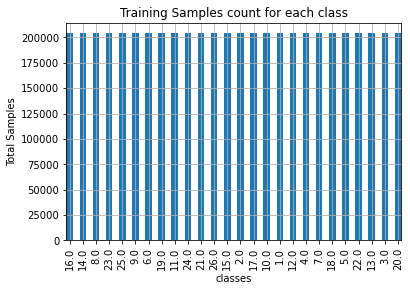

In [14]:
df_Train['Class_label'].value_counts().plot(kind='bar',
                                   title='Training Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

In [15]:
df_Test = read_data_Test(file_path_test)
# Describe the data
show_basic_dataframe_info(df_Test)
df_Test.head(10)

Number of columns in the dataframe: 33
Number of rows in the dataframe: 2652000



,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C24,C25,C26,C27,C28,C29,C30,C31,C32,Class_label
0,-0.003114,0.000680,-0.002965,0.001857,-0.002391,0.001426,-0.002946,0.006420,0.006341,0.008690,...,-0.000032,-0.012348,-0.006998,-0.000773,0.000048,-0.020151,0.003474,-0.000126,0.005377,1.0
1,-0.006698,0.000146,-0.005215,0.002924,0.000148,-0.000617,-0.003882,0.007467,0.005885,0.012591,...,-0.000053,0.008800,-0.002715,-0.000478,-0.000018,-0.000194,0.002926,-0.000217,0.005718,1.0
2,-0.007254,-0.000074,-0.006222,0.003336,0.005378,-0.002066,-0.004646,0.008274,-0.004960,0.008811,...,0.000006,-0.003635,0.004409,0.000114,-0.000040,0.016211,0.001695,-0.000123,0.005718,1.0
3,-0.001602,0.000570,-0.005639,0.002924,-0.008731,-0.000359,-0.005133,0.008794,-0.000034,-0.000937,...,0.000097,0.002648,0.006965,0.000837,-0.000032,0.006314,-0.000595,0.000091,0.005383,1.0
4,0.006751,0.001262,-0.003547,0.001857,0.015859,0.001869,-0.005291,0.008977,0.012469,-0.010637,...,0.000172,-0.000665,0.004815,0.001543,-0.000007,-0.009607,-0.003458,0.000327,0.004765,1.0
5,-0.006122,0.000860,-0.000235,0.000395,0.000077,0.001982,-0.005102,0.008794,-0.019195,-0.012105,...,0.000204,-0.007058,0.000579,0.002142,0.000020,0.009060,-0.005704,0.000474,0.003927,1.0
6,-0.005247,-0.001389,0.003586,-0.001205,-0.011097,0.000567,-0.004616,0.008274,-0.003075,-0.004499,...,0.000181,-0.000822,-0.003282,0.002559,0.000037,-0.009899,-0.004638,0.000441,0.002928,1.0
7,0.004462,-0.004968,0.007018,-0.002685,-0.030667,-0.001086,-0.003836,0.007467,0.026868,0.005520,...,0.000096,0.005603,-0.005924,0.002718,0.000030,0.009875,0.000117,0.000211,0.001825,1.0
8,-0.002243,-0.008015,0.009078,-0.003788,-0.015026,-0.001921,-0.002747,0.006420,0.010642,0.011233,...,-0.000054,0.006759,-0.006902,0.002543,-0.000010,-0.010185,0.004654,-0.000171,0.000670,1.0
9,-0.003535,-0.005558,0.008961,-0.004308,0.029990,-0.001758,-0.001328,0.005181,-0.008984,0.011513,...,-0.000267,0.012806,-0.005815,0.001989,-0.000077,-0.003386,0.005296,-0.000645,-0.000481,1.0


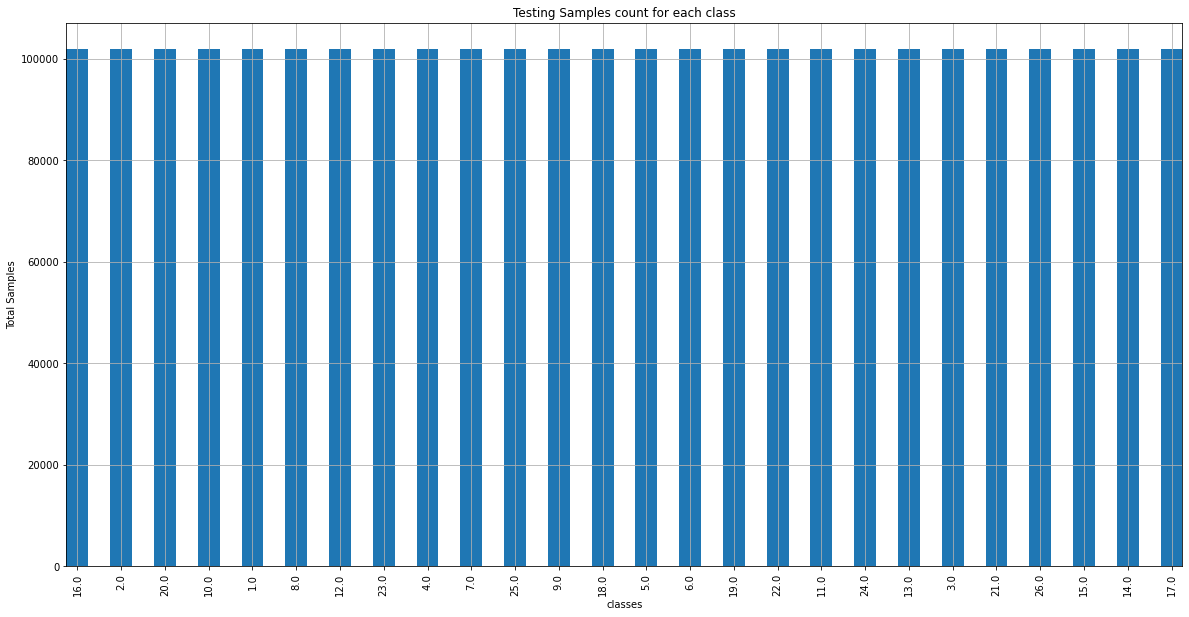

In [16]:
df_Test['Class_label'].value_counts().plot(kind='bar',
                                   title='Testing Samples count for each class')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
plt.ylabel('Total Samples')
plt.xlabel('classes')
plt.grid(True)
plt.autoscale(axis='x',tight=True)

In [17]:
pd.options.display.float_format = "{:,.5f}".format
df_Train.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C24,C25,C26,C27,C28,C29,C30,C31,C32,Class_label
0,0.00524,0.00219,-0.00216,-0.00001,0.01472,0.00290,-0.00323,0.00454,0.00050,0.00261,...,-0.00718,0.00551,0.01134,-0.00074,0.00390,0.00247,-0.01132,0.00891,-0.00279,1.00000
1,-0.00473,-0.00006,-0.00229,-0.00000,-0.01132,0.00415,-0.00346,0.00456,-0.01479,0.00388,...,-0.00732,0.00220,0.00811,0.00005,0.00411,0.01534,-0.01166,0.00904,-0.00281,1.00000
2,0.00367,-0.00159,-0.00243,-0.00000,-0.02306,0.00461,-0.00354,0.00457,-0.01249,0.00261,...,-0.00742,0.00329,0.00183,0.00053,0.00457,-0.01282,-0.01132,0.00891,-0.00279,1.00000
3,0.00032,0.00035,-0.00233,-0.00000,-0.01971,0.00415,-0.00346,0.00456,0.01092,-0.00070,...,-0.00748,-0.00244,-0.00524,0.00073,0.00518,0.00920,-0.00728,0.00852,-0.00275,1.00000
4,-0.00279,0.00125,-0.00174,-0.00001,-0.00682,0.00290,-0.00323,0.00454,-0.00502,-0.00433,...,-0.00750,0.00572,-0.01070,0.00067,0.00586,-0.01020,0.00144,0.00785,-0.00267,1.00000


In [18]:
scaler = preprocessing.StandardScaler().fit(df_Train.iloc[:,0:N_FEATURES])

In [19]:
df_Train.iloc[:,0:N_FEATURES]=scaler.transform(df_Train.iloc[:,0:N_FEATURES])

In [20]:
pd.options.display.float_format = "{:,.5f}".format
df_Train.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C24,C25,C26,C27,C28,C29,C30,C31,C32,Class_label
0,0.02263,0.02155,-0.04612,-0.00085,0.03689,0.01464,-0.04156,0.09959,0.00963,0.03047,...,-0.32121,0.03973,0.14676,-0.01973,0.17166,0.01294,-0.19714,0.30282,-0.15839,1.00000
1,-0.03781,-0.00199,-0.04886,-0.00078,-0.06573,0.02270,-0.04442,0.10017,-0.09660,0.04482,...,-0.32738,0.01260,0.10466,0.00145,0.18079,0.14462,-0.20316,0.30724,-0.15924,1.00000
2,0.01310,-0.01797,-0.05197,-0.00074,-0.11196,0.02567,-0.04545,0.10035,-0.08061,0.03047,...,-0.33193,0.02152,0.02295,0.01440,0.20112,-0.14343,-0.19714,0.30282,-0.15839,1.00000
3,-0.00718,0.00235,-0.04982,-0.00078,-0.09877,0.02270,-0.04442,0.10017,0.08202,-0.00714,...,-0.33473,-0.02529,-0.06900,0.01975,0.22827,0.08175,-0.12762,0.28938,-0.15583,1.00000
4,-0.02604,0.01174,-0.03717,-0.00085,-0.04798,0.01464,-0.04156,0.09959,-0.02872,-0.04823,...,-0.33569,0.04144,-0.14007,0.01806,0.25795,-0.11658,0.02282,0.26669,-0.15151,1.00000


In [21]:
pd.options.display.float_format = "{:,.5f}".format
df_Test.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C24,C25,C26,C27,C28,C29,C30,C31,C32,Class_label
0,-0.00311,0.00068,-0.00297,0.00186,-0.00239,0.00143,-0.00295,0.00642,0.00634,0.00869,...,-0.00003,-0.01235,-0.00700,-0.00077,0.00005,-0.02015,0.00347,-0.00013,0.00538,1.00000
1,-0.00670,0.00015,-0.00522,0.00292,0.00015,-0.00062,-0.00388,0.00747,0.00589,0.01259,...,-0.00005,0.00880,-0.00271,-0.00048,-0.00002,-0.00019,0.00293,-0.00022,0.00572,1.00000
2,-0.00725,-0.00007,-0.00622,0.00334,0.00538,-0.00207,-0.00465,0.00827,-0.00496,0.00881,...,0.00001,-0.00364,0.00441,0.00011,-0.00004,0.01621,0.00169,-0.00012,0.00572,1.00000
3,-0.00160,0.00057,-0.00564,0.00292,-0.00873,-0.00036,-0.00513,0.00879,-0.00003,-0.00094,...,0.00010,0.00265,0.00697,0.00084,-0.00003,0.00631,-0.00059,0.00009,0.00538,1.00000
4,0.00675,0.00126,-0.00355,0.00186,0.01586,0.00187,-0.00529,0.00898,0.01247,-0.01064,...,0.00017,-0.00067,0.00481,0.00154,-0.00001,-0.00961,-0.00346,0.00033,0.00477,1.00000


In [22]:
df_Test.iloc[:,0:N_FEATURES]=scaler.transform(df_Test.iloc[:,0:N_FEATURES])

In [23]:
pd.options.display.float_format = "{:,.5f}".format
df_Test.head(5)

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C24,C25,C26,C27,C28,C29,C30,C31,C32,Class_label
0,-0.02799,0.00577,-0.06326,0.06726,-0.03053,0.00520,-0.03794,0.14096,0.05022,0.09937,...,-0.00253,-0.10632,-0.09191,-0.02064,0.00180,-0.21837,0.05784,-0.00422,0.30410,1.00000
1,-0.04970,0.00018,-0.11105,0.10626,-0.02052,-0.00792,-0.04981,0.16394,0.04705,0.14360,...,-0.00350,0.06659,-0.03617,-0.01269,-0.00113,-0.01427,0.04839,-0.00728,0.32342,1.00000
2,-0.05307,-0.00213,-0.13244,0.12135,0.00009,-0.01722,-0.05950,0.18166,-0.02830,0.10074,...,-0.00085,-0.03508,0.05655,0.00320,-0.00211,0.15350,0.02715,-0.00412,0.32342,1.00000
3,-0.01883,0.00462,-0.12006,0.10626,-0.05551,-0.00626,-0.06569,0.19307,0.00592,-0.00980,...,0.00323,0.01629,0.08982,0.02264,-0.00175,0.05229,-0.01232,0.00317,0.30443,1.00000
4,0.03176,0.01187,-0.07562,0.06726,0.04139,0.00804,-0.06769,0.19710,0.09280,-0.11979,...,0.00654,-0.01080,0.06183,0.04162,-0.00065,-0.11054,-0.06169,0.01119,0.26945,1.00000


In [24]:
LABEL = 'ActivityEncoded'
# Transform the labels from String to Integer via LabelEncoder
le = preprocessing.LabelEncoder()
# Add a new column to the existing DataFrame with the encoded values
df_Train[LABEL] = le.fit_transform(df_Train['Class_label'].values.ravel())
# df_Valid[LABEL] = le.fit_transform(df_Valid['Class_label'].values.ravel())
df_Test[LABEL] = le.fit_transform(df_Test['Class_label'].values.ravel())
print('df_train_size',df_Train)
# print('df_valid_size',df_Valid)
print('df_test_size',df_Test)

df_train_size               C1       C2       C3       C4       C5       C6       C7  \
0        0.02263  0.02155 -0.04612 -0.00085  0.03689  0.01464 -0.04156   
1       -0.03781 -0.00199 -0.04886 -0.00078 -0.06573  0.02270 -0.04442   
2        0.01310 -0.01797 -0.05197 -0.00074 -0.11196  0.02567 -0.04545   
3       -0.00718  0.00235 -0.04982 -0.00078 -0.09877  0.02270 -0.04442   
4       -0.02604  0.01174 -0.03717 -0.00085 -0.04798  0.01464 -0.04156   
...          ...      ...      ...      ...      ...      ...      ...   
5303995 -0.30695  0.12759  0.44679  0.43770 -0.02026 -0.01682  0.04250   
5303996 -0.00685  0.18409  0.46141  0.44194  0.09256  0.01701  0.02976   
5303997  0.42675  0.20634  0.46657  0.44337  0.12307  0.04784  0.01531   
5303998  0.13257  0.18409  0.46141  0.44194 -0.08884  0.07113 -0.00000   
5303999 -0.28504  0.12759  0.44679  0.43770 -0.17656  0.08552 -0.01531   

             C8       C9      C10  ...      C25      C26      C27      C28  \
0       0.09959  0.

In [25]:
# 15 function to segment data into trial lengths (trial length =513 samples in this dataset)
def create_segments_and_labels(df, time_steps,step,n_features, label_name):
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, step):
      for j in range(1, n_features+1):
        L = ('C'+str(j)) 
        segments.append(df[str(L)].values[i: i + time_steps])
      label = stats.mode(df[label_name][i: i + time_steps])[0][0]
      labels.append(label)
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, n_features)
    labels = np.asarray(labels)
    return reshaped_segments, labels

In [26]:
# The number of steps within one time segment
TIME_PERIODS = 6000
# The steps to take from one segment to the next; if this value is equal to
# TIME_PERIODS, then there is no overlap between the segments
STEP_DISTANCE = 6000

In [27]:
x_train, y_train = create_segments_and_labels(df_Train,TIME_PERIODS,STEP_DISTANCE,N_FEATURES,LABEL)
print('x_train shape: ', x_train.shape)
# print(x_train)
print(x_train.shape[0], 'training samples')
print('y_train shape: ', y_train.shape)
# Set input & output dimensions
num_time_periods, num_sensors = x_train.shape[1], x_train.shape[2]
print(num_time_periods)
print(num_sensors)
num_classes = le.classes_.size
print(list(le.classes_))
# input_shape = (num_time_periods,num_sensors)
# print(input_shape)
input_shape = (num_time_periods,num_sensors)
#x_train = x_train.reshape(x_train.shape[0], input_shape)
print('x_train shape:', x_train[0].shape)
# print('input_shape:', input_shape)
# print('input_shape[0]',input_shape[0])
# print('input_shape[1]',input_shape[1])
# print('input_shape[-1]',input_shape[-1])
x_train = x_train.astype('float32')
# x_train = [torch.tensor(arr, dtype=torch.float32) for arr in x_train]
# y_train = y_train.astype('float32')
# print(y_train)
y_train_hot = np_utils.to_categorical(y_train, num_classes)
print(y_train_hot)
# y_train_hot= [torch.tensor(arr, dtype=torch.uint8) for arr in y_train_hot]
print('New y_train shape: ', y_train_hot.shape)

x_train shape:  (883, 6000, 32)
883 training samples
y_train shape:  (883,)
6000
32
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0]
x_train shape: (6000, 32)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
New y_train shape:  (883, 26)


In [28]:
x_test, y_test = create_segments_and_labels(df_Test,TIME_PERIODS,STEP_DISTANCE,N_FEATURES,LABEL)
print('x_test shape: ', x_test.shape)
# print(x_train)
print(x_test.shape[0], 'testing samples')
print('y_test shape: ', y_test.shape)
# Set input_shape / reshape for Keras
#x_test = x_test.reshape(x_test.shape[0], input_shape)
x_test = x_test.astype('float32')
#y_test = y_test.astype('float32')
#print(y_test)
y_test_hot = np_utils.to_categorical(y_test, num_classes)
print(y_test_hot)

x_test shape:  (441, 6000, 32)
441 testing samples
y_test shape:  (441,)
[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [30]:
# n_steps, n_length = 20, 25
# n_steps, n_length= 10, 50
# n_steps, n_length= 16, 32
# n_steps, n_length, n_depth = 15, 400, 8
n_steps, n_length, n_depth, n_chan = 100, 60, 32, 1
# x_train = x_train.reshape(x_train.shape[0], n_steps, n_length, n_depth)
x_train = x_train.reshape(x_train.shape[0], n_steps, n_length, n_depth,n_chan)
print('x_train shape: ', x_train.shape)
# # x_valid = x_valid.reshape(x_valid.shape[0], n_steps, n_length, n_depth)
# # print('x_valid shape: ', x_valid.shape)
# x_test = x_test.reshape(x_test.shape[0], n_steps, n_length,n_depth)
x_test = x_test.reshape(x_test.shape[0], n_steps, n_length,n_depth,n_chan)
print('x_test shape: ', x_test.shape)
n_outputs = y_train_hot.shape[1]
#print('n_outputs',n_outputs)

x_train shape:  (883, 100, 60, 32, 1)
x_test shape:  (441, 100, 60, 32, 1)


In [31]:
# n_steps = TIME_PERIODS
# n_vector = N_FEATURES

In [32]:
# n_vector =  n_length*n_depth
# print(n_vector)
# x_train = x_train.reshape(x_train.shape[0], n_steps, n_vector)
# print('x_train shape: ', x_train.shape)
# x_test = x_test.reshape(x_test.shape[0], n_steps, n_vector)
# print('x_test shape: ', x_test.shape)

In [33]:
#seq_len = n_steps
seq_len = x_train.shape[1]
n_channel = x_train.shape[-1]
# n_vector = 64
d_k = 64
d_v = 64
n_heads = 10
ff_dim = 2048
# ff_dim2 = 1024
N_depth = 2
N_depth1 = 2

In [34]:
from tensorflow.keras.models import *
from tensorflow.keras.layers import *

In [35]:
#@save
class PositionWiseFFN(tf.keras.layers.Layer):
    """Positionwise feed-forward network."""
    def __init__(self, ffn_num_hiddens, ffn_num_outputs, **kwargs):
        super().__init__(*kwargs)
        self.dense1 = tf.keras.layers.Dense(ffn_num_hiddens)
        self.relu = tf.keras.layers.ReLU()
        self.dense2 = tf.keras.layers.Dense(ffn_num_outputs)

    def call(self, X):
        return self.dense2(self.relu(self.dense1(X)))

In [36]:
# 22 Transformer encoder
class TransformerEncoder(Layer):
  def __init__(self, d_k, d_v, n_heads, ff_dim, dropout=0.3, **kwargs):
    super(TransformerEncoder, self).__init__()
    self.d_k = d_k
    self.d_v = d_v
    self.n_heads = n_heads
    self.ff_dim = ff_dim
    self.attn_heads = list()
    self.dropout_rate = dropout

  def build(self, input_shape):
    self.attn_multi = MultiAttention(self.d_k, self.d_v, self.n_heads)
    self.attn_dropout = Dropout(self.dropout_rate)
    self.attn_normalize = LayerNormalization(input_shape=input_shape, epsilon=1e-6)
    # print('input_shape',inputshape)
#     self.ffn = PositionWiseFFN(self.ff_dim, input_shape[0][-1])
    self.ff_dense1 = Dense(self.ff_dim,input_shape=input_shape,activation="tanh")
    self.ff_dense2 = Dense(input_shape[0][-1],input_shape=input_shape)
#     self.ff_conv1D_1 = Conv1D(filters=self.ff_dim, kernel_size=1, padding="same", activation='relu')
#     self.ff_conv1D_2 = Conv1D(filters=input_shape[0][-1], padding="same", kernel_size=1) 
    self.ff_dropout = Dropout(self.dropout_rate)
    self.ff_normalize = LayerNormalization(input_shape=input_shape, epsilon=1e-6)    
  
  def call(self, inputs): # inputs = (in_seq, in_seq, in_seq)
    attn_layer = self.attn_multi(inputs)
    attn_layer = self.attn_dropout(attn_layer)
    attn_out = self.attn_normalize(inputs[0] + attn_layer)

#     ff_layer = self.ffn(attn_out)
    ff_layer = self.ff_dense1(attn_out)
    ff_layer = self.ff_dense2(ff_layer)
#     ff_layer = self.ff_dropout(ff_layer)
    ff_out = self.ff_normalize(attn_out + ff_layer)
#     print("ff_layer",ff_layer.shape)
    return ff_out 

  def get_config(self): # Needed for saving and loading model with custom layer
    config = super().get_config().copy()
    config.update({'d_k': self.d_k,
                   'd_v': self.d_v,
                   'n_heads': self.n_heads,
                   'ff_dim': self.ff_dim,
#                    'ff_dim2': self.ff_dim2,
                   'attn_heads': self.attn_heads,
                   'dropout_rate': self.dropout_rate})
    return config  

In [37]:
# 23 Single and multiattention functions
class SingleAttention(Layer):
  def __init__(self, d_k, d_v):
    super(SingleAttention, self).__init__()
    self.d_k = d_k
    self.d_v = d_v

  def build(self, input_shape):
    self.query = Dense(self.d_k, 
                       input_shape=input_shape, 
                       kernel_initializer='glorot_uniform', 
                       bias_initializer='glorot_uniform')
    
    self.key = Dense(self.d_k, 
                     input_shape=input_shape, 
                     kernel_initializer='glorot_uniform', 
                     bias_initializer='glorot_uniform')
    
    self.value = Dense(self.d_v, 
                       input_shape=input_shape, 
                       kernel_initializer='glorot_uniform', 
                       bias_initializer='glorot_uniform')

  def call(self, inputs): # inputs = (in_seq, in_seq, in_seq)

    q = self.query(inputs[0])
    k = self.key(inputs[1])
#     print("q_shape",q.shape)
#     print("k_shape",k.shape)
    attn_weights = tf.matmul(q, k, transpose_b=True)
#     attn_weights = tf.math.add(q, k)
#     print("attn_shape", attn_weights.shape)
    attn_weights = tf.map_fn(lambda x: x/np.sqrt(self.d_k), attn_weights)
#     print("attn_shape", attn_weights.shape)
    attn_weights = tf.nn.softmax(attn_weights, axis=-1)
#     print("attn_shape", attn_weights.shape)
    
    v = self.value(inputs[2])
#     print("v_shape",v.shape)
    attn_out = tf.matmul(attn_weights, v)
#     attn_out = tf.math.add(attn_weights, v)
#     print("v1_shape",attn_out.shape)
    return attn_out     

In [38]:
class MultiAttention(Layer):
  def __init__(self, d_k, d_v, n_heads):
    super(MultiAttention, self).__init__()
    self.d_k = d_k
    self.d_v = d_v
    self.n_heads = n_heads
    self.attn_heads = list()

  def build(self, input_shape):
    for n in range(self.n_heads):
      self.attn_heads.append(SingleAttention(self.d_k, self.d_v))  
    
    # input_shape[0]=(batch, seq_len, 7), input_shape[0][-1]=7 
    self.linear = Dense(input_shape[0][-1], 
                        input_shape=input_shape, 
                        kernel_initializer='glorot_uniform', 
                        bias_initializer='glorot_uniform')

  def call(self, inputs):
    attn = [self.attn_heads[i](inputs) for i in range(self.n_heads)]
#     print("multi_out",len(attn))
    concat_attn = tf.concat(attn, axis=-1)
#     concat_attn = tf.transpose(concat_attn,perm=[0,2, 1])
#     print("concat_out",concat_attn.shape)
    multi_linear = self.linear(concat_attn)
#     print("multi_linear",multi_linear.shape)
    return multi_linear 

In [39]:
# 24 Time to vector conversion
class Time2Vector(Layer):
  def __init__(self, seq_len, **kwargs):
    super(Time2Vector, self).__init__()
    self.seq_len = seq_len

  def build(self, input_shape):
    '''Initialize weights and biases with shape (batch, seq_len)'''
    self.weights_linear = self.add_weight(name='weight_linear',
                                shape=(int(self.seq_len),),
                                initializer='uniform',
                                trainable=True)
    
    self.bias_linear = self.add_weight(name='bias_linear',
                                shape=(int(self.seq_len),),
                                initializer='uniform',
                                trainable=True)
    
    self.weights_periodic = self.add_weight(name='weight_periodic',
                                shape=(int(self.seq_len),),
                                initializer='uniform',
                                trainable=True)

    self.bias_periodic = self.add_weight(name='bias_periodic',
                                shape=(int(self.seq_len),),
                                initializer='uniform',
                                trainable=True)

  def call(self, x):
    '''Calculate linear and periodic time features'''
    x = tf.math.reduce_mean(x[:,:,:4], axis=-1) 
    time_linear = self.weights_linear * x + self.bias_linear # Linear time feature
    time_linear = tf.expand_dims(time_linear, axis=-1) # Add dimension (batch, seq_len, 1)
    
    time_periodic = tf.math.sin(tf.multiply(x, self.weights_periodic) + self.bias_periodic)
    time_periodic = tf.expand_dims(time_periodic, axis=-1) # Add dimension (batch, seq_len, 1)
    return tf.concat([time_linear, time_periodic], axis=-1) # shape = (batch, seq_len, 2)
   
  def get_config(self): # Needed for saving and loading model with custom layer
    config = super().get_config().copy()
    config.update({'seq_len': self.seq_len})
    return config

In [40]:
# 22 Transformer encoder
class TransformerEncoder2(Layer):
  def __init__(self, d_k, d_v, n_heads, ff_dim, dropout=0.3, **kwargs):
    super(TransformerEncoder2, self).__init__()
    self.d_k = d_k
    self.d_v = d_v
    self.n_heads = n_heads
    self.ff_dim = ff_dim
    self.attn_heads = list()
    self.dropout_rate = dropout

  def build(self, input_shape):
    self.attn_multi = MultiAttention2(self.d_k, self.d_v, self.n_heads)
    self.attn_dropout = Dropout(self.dropout_rate)
    self.attn_normalize = LayerNormalization(input_shape=input_shape, epsilon=1e-6)
    # print('input_shape',inputshape)
    self.ffn = PositionWiseFFN(self.ff_dim, input_shape[0][-1])
#     self.ff_dense1 = Dense(self.ff_dim,input_shape=input_shape,activation="tanh")
#     self.ff_dense2 = Dense(input_shape[0][-1],input_shape=input_shape,activation="tanh")
#     self.ff_conv1D_1 = Conv1D(filters=self.ff_dim, kernel_size=1, padding="same", activation='relu')
#     self.ff_conv1D_2 = Conv1D(filters=input_shape[0][-1], padding="same", kernel_size=1) 
    self.ff_dropout = Dropout(self.dropout_rate)
    self.ff_normalize = LayerNormalization(input_shape=input_shape, epsilon=1e-6)    
  
  def call(self, inputs): # inputs = (in_seq, in_seq, in_seq)
    attn_layer = self.attn_multi(inputs)
    attn_layer = self.attn_dropout(attn_layer)
    attn_out = self.attn_normalize(inputs[0] + attn_layer)

    ff_layer = self.ffn(attn_out)
#     ff_layer = self.ff_dense1(attn_out)
#     ff_layer = self.ff_dense2(ff_layer)
#     ff_layer = self.ff_dropout(ff_layer)
    ff_out = self.ff_normalize(attn_out + ff_layer)
#     print("ff_layer",ff_layer.shape)
    return ff_out 

  def get_config(self): # Needed for saving and loading model with custom layer
    config = super().get_config().copy()
    config.update({'d_k': self.d_k,
                   'd_v': self.d_v,
                   'n_heads': self.n_heads,
                   'ff_dim': self.ff_dim,
#                    'ff_dim2': self.ff_dim2,
                   'attn_heads': self.attn_heads,
                   'dropout_rate': self.dropout_rate})
    return config  

In [41]:
# 23 Single and multiattention functions
class SingleAttention2(Layer):
  def __init__(self, d_k, d_v):
    super(SingleAttention2, self).__init__()
    self.d_k = d_k
    self.d_v = d_v

  def build(self, input_shape):
    self.query = Dense(self.d_k, 
                       input_shape=input_shape, 
                       kernel_initializer='glorot_uniform', 
                       bias_initializer='glorot_uniform')
    
    self.key = Dense(self.d_k, 
                     input_shape=input_shape, 
                     kernel_initializer='glorot_uniform', 
                     bias_initializer='glorot_uniform')
    
    self.value = Dense(self.d_v, 
                       input_shape=input_shape, 
                       kernel_initializer='glorot_uniform', 
                       bias_initializer='glorot_uniform')

  def call(self, inputs): # inputs = (in_seq, in_seq, in_seq)

    q = self.query(inputs[0])
    k = self.key(inputs[1])
#     print("q_shape",q.shape)
#     print("k_shape",k.shape)
    attn_weights = tf.matmul(q, k, transpose_b=True)
#     attn_weights = tf.math.add(q, k)
#     print("attn_shape", attn_weights.shape)
    attn_weights = tf.map_fn(lambda x: x/np.sqrt(self.d_k), attn_weights)
#     print("attn_shape", attn_weights.shape)
    attn_weights = tf.nn.softmax(attn_weights, axis=-1)
#     print("attn_shape", attn_weights.shape)
    
    v = self.value(inputs[2])
#     print("v_shape",v.shape)
    attn_out = tf.matmul(attn_weights, v)
#     attn_out = tf.math.add(attn_weights, v)
#     print("v1_shape",attn_out.shape)
    return attn_out

In [42]:
class MultiAttention2(Layer):
  def __init__(self, d_k, d_v, n_heads):
    super(MultiAttention2, self).__init__()
    self.d_k = d_k
    self.d_v = d_v
    self.n_heads = n_heads
    self.attn_heads = list()

  def build(self, input_shape):
    for n in range(self.n_heads):
      self.attn_heads.append(SingleAttention2(self.d_k, self.d_v))  
    
    # input_shape[0]=(batch, seq_len, 7), input_shape[0][-1]=7 
    self.linear = Dense(input_shape[0][-1], 
                        input_shape=input_shape, 
                        kernel_initializer='glorot_uniform', 
                        bias_initializer='glorot_uniform')

  def call(self, inputs):
    attn = [self.attn_heads[i](inputs) for i in range(self.n_heads)]
#     print("multi_out",len(attn))
    concat_attn = tf.concat(attn, axis=-1)
#     concat_attn = tf.transpose(concat_attn,perm=[0,2, 1])
#     print("concat_out",concat_attn.shape)
    multi_linear = self.linear(concat_attn)
#     print("multi_linear",multi_linear.shape)
    return multi_linear

In [43]:
#   x = Conv1D(filters=32, kernel_size=9, padding='same',kernel_initializer='he_normal',strides=3,kernel_regularizer=l1(1e-04))(x)
                      
# #   x = LayerNormalization(epsilon=1e-6)(x)     
#   x = TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None))(x)
#   x = TimeDistributed(Activation('tanh'))(x)
#   x = TimeDistributed(Dropout(0.3))(x)
#   x = TimeDistributed(MaxPooling1D(pool_size=(2),strides=1))(x)  
#   x = TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer='he_normal',strides=3,kernel_regularizer=l1(1e-04)))(x)
# #   x = LayerNormalization(epsilon=1e-6)(x)
#   x = TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None))(x)
#   x = TimeDistributed(Activation('tanh'))(x)
#   x = TimeDistributed(MaxPooling1D(pool_size=(3),strides=1))(x) 
# #   x = Bidirectional(LSTM(200,return_sequences=True))(x)
#   x = TimeDistributed(Dropout(0.3))(x)

In [44]:
#   x = Conv3D(32,9,strides=2,padding='same',data_format='channels_last',kernel_regularizer=l1(1e-05),kernel_initializer='he_normal')(x)
# #   x = LayerNormalization(epsilon=1e-6)(x)     
#   x = BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)(x)
#   x = Activation('tanh')(x)
#   x = Dropout(0.3)(x)
#   x = MaxPooling3D(pool_size=(2, 1, 2),strides=1)(x)  
#   x = Conv3D(64,5,strides=1,padding='same',data_format='channels_last',kernel_regularizer=l1(1e-05),kernel_initializer='he_normal')(x)
# #   x = LayerNormalization(epsilon=1e-6)(x)
#   x = BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)(x)
#   x = Activation('tanh')(x)
#   x = MaxPooling3D(pool_size=(2, 1, 2),strides=1)(x) 
# #   x = Bidirectional(LSTM(200,return_sequences=True))(x)
#   x = Dropout(0.3)(x)

In [45]:
from keras.layers import Layer
import keras.backend as K

In [46]:
class spatialattention(Layer):
    def __init__(self,**kwargs):
        super(spatialattention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")        
        super(spatialattention, self).build(input_shape)

    def call(self,x):
        et=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
#         et1=K.dot(et,self.W)+self.b
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
#         output = at
        return output
#         return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[1],input_shape[-1])

    def get_config(self):
        return super(spatialattention,self).get_config()

In [47]:
class temporalattention(Layer):
    def __init__(self,**kwargs):
        super(temporalattention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="att_bias",shape=(input_shape[1],1),initializer="zeros")        
        super(temporalattention, self).build(input_shape)

    def call(self,x):
        et=K.squeeze(K.relu(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(et)
        at=K.expand_dims(at,axis=-1)
        output=x*at
#         output=at
        return output
#         return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[1],input_shape[-1])

    def get_config(self):
        return super(temporalattention,self).get_config()

In [48]:
def step_decay(epoch):
   initial_lrate = 1e-4
   drop = 0.1
   epochs_drop = 70.0
   lrate = initial_lrate * tf.math.pow(drop,  
           tf.math.floor((1+epoch)/epochs_drop))
   return lrate

In [49]:
# def scheduler(epoch, lr):
#   if epoch < 70:
#     return lr
#   else:
#     return lr * tf.math.exp(-0.1)

In [50]:
# lrate_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [51]:
lrate = tf.keras.callbacks.LearningRateScheduler(step_decay)

In [52]:
# print(lrate)

In [53]:
# learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-4, decay_steps=30, decay_rate=.1)

In [54]:
# opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)

In [55]:
LABELS=[]
for i in range(1,n_outputs+1,1):
  LABELS.append (i)
print(LABELS)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


In [58]:
# 25 model creation
def create_model():
  '''Initialize time and transformer layers'''
#   time_embedding = Time2Vector(seq_len)
  # print('time_embedding',time_embedding)
  attn_layer1 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
  attn_layer2 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
#   attn_layer3 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
#   attn_layer4 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)

  #Conv1 = Conv1D(filters=64, kernel_size=9, padding='same', kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04)), \
       #                    input_shape=(none, n_steps,n_vector)) 
 
  '''Construct model'''
#   in_seq = Input(shape=(n_steps, n_length, n_depth))
  in_seq = Input(shape=(n_steps, n_length, n_depth, n_chan))
  x = in_seq
    
  x = Conv3D(64,kernel_size=(9,9,9),strides=2,padding='same',data_format='channels_last',kernel_regularizer=l1(1e-05),kernel_initializer='he_normal')(x)
#   x = LayerNormalization(epsilon=1e-6)(x)     
  x = BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)(x)
  x = Activation('tanh')(x)
  x = Dropout(0.3)(x)
  x = MaxPooling3D(pool_size=(2, 1, 2),strides=1)(x)  
  x = Conv3D(64,kernel_size=(5,5,5),strides=2,padding='same',data_format='channels_last',kernel_regularizer=l1(1e-05),kernel_initializer='he_normal')(x)
#   x = LayerNormalization(epsilon=1e-6)(x)
  x = BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)(x)
#   x = Activation('tanh')(x)
#   x = MaxPooling3D(pool_size=(3, 3, 1),strides=1)(x) 
# #   x = Bidirectional(LSTM(200,return_sequences=True))(x)
#   x = Dropout(0.3)(x)
#   x = Conv3D(64,3,strides=1,padding='same',data_format='channels_last',kernel_regularizer=l1(1e-05),kernel_initializer='he_normal')(x)
# #   x = LayerNormalization(epsilon=1e-6)(x)
#   x = BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)(x)
  x = Activation('tanh')(x)
  x = MaxPooling3D(pool_size=(2, 1, 2),strides=1)(x) 
#   x = Bidirectional(LSTM(200,return_sequences=True))(x)
  x = Dropout(0.3)(x)
#   x = Activation('relu')(x)
  x = Conv3D(64,kernel_size=(3,3,3),strides=1,padding='same',kernel_regularizer=l1(1e-05),kernel_initializer='he_normal')(x)
#   x = LayerNormalization(epsilon=1e-6)(x)
  x = BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)(x)
  x = Activation('tanh')(x)
#   x = MaxPooling3D(pool_size=(2, 1, 2),strides=1)(x) 
#   x = Bidirectional(LSTM(200,return_sequences=True))(x)
  x = Dropout(0.3)(x)
#   x = Conv3D(64,3,strides=1,padding='same',kernel_regularizer=l1(1e-05),kernel_initializer='he_normal')(x)
# #   x = LayerNormalization(epsilon=1e-6)(x)
#   x = BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)(x)
#   x = Activation('tanh')(x)
# #   x = MaxPooling3D(pool_size=(2, 1, 2),strides=1)(x) 
# #   x = Bidirectional(LSTM(200,return_sequences=True))(x)
#   x = Dropout(0.3)(x)
  x = Activation('relu')(x)
  x = TimeDistributed(Flatten())(x)
  print("x_shape",x.shape)
  sp_att_out = x


#   sp_att_out = spatialattention()(x)
# #   tp_att_out = temporalattention()(x) 
# #   print("x_shape",x.shape)
# #   print("sp_att_shape",sp_att_out.shape)
# #   L_in = tf.matmul(x,sp_att_out,transpose_b=True)
#   L_in = LSTM(200,return_sequences=True)(sp_att_out)
#   L_in = Dropout(0.3)(L_in)
#   L_in = LSTM(200,return_sequences=True)(L_in)
#   L_in = LSTM(200,return_sequences=True)(L_in)
#   L_out = LSTM(200,return_sequences=True)(L_in)
# #   L_out = tf.matmul(L_in,tp_att_out,transpose_b=True)
#   tp_att_in = Dropout(0.3)(L_out)
#   tp_att_out = temporalattention()(tp_att_in)


  l = sp_att_out
  len = sp_att_out.shape[-2]  
  time_embedding = Time2Vector(len)
  x1 = time_embedding(sp_att_out)
  print("x1_shape",x1.shape)
  x = Concatenate(axis=-1)([l, x1])
  x2 = x
  for n in range(N_depth):  
        x = attn_layer1((x, x, x))
  print("x_shape",x.shape)
  L_out = x 
#   tp_att_out = temporalattention()(L_out)

#   x3 = tf.add(x, x2)
#   for n in range(N_depth1):  
#         x3 = attn_layer2((x3, x3, x3))
#   print("x3_shape",x3.shape)
    
#   for n in range(N_depth):  
#         x = attn_layer1((x, x, x))
#   print("x_shape",x.shape)
#   for n in range(N_depth1):  
#         x = attn_layer1((x, x, x))
#   print("x_shape",x.shape)
#   z = concatenate([x, x2])
  z = L_out
#   z = tf.add(x, x2) 
  print("z_shape",z.shape)
#   l = z
#   len = z.shape[-2]  
#   time_embedding = Time2Vector(len)
#   z1 = time_embedding(z)
#   print("z1_shape",z1.shape)
#   z = Concatenate(axis=-1)([l, z1])
#   for n in range(N_depth1):  
#         z = attn_layer2((z, z, z))
# #   print("z_shape",z.shape)
#   z = Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer='he_normal',strides=1,kernel_regularizer=l1(1e-04))(z)
# #   x = LayerNormalization(epsilon=1e-6)(x)
#   z = BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)(z)
#   z = Activation('tanh')(z)
# #   z = MaxPooling1D(pool_size=(3),strides=1))(z) 
# #   x = Bidirectional(LSTM(200,return_sequences=True))(x)
#   z = Dropout(0.3)(z)
  z = Flatten()(z)
#   x = Flatten()(x)
  #x = Dense(2048, activation='tanh')(x)
  #x = BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None)(x)
#   x = Flatten()(x)
#   x = Dropout(0.5)(x)
  z = Dense(512, activation='tanh')(z)
  z = Dense(128, activation='tanh')(z)  
#   z = Dense(64, activation='tanh')(z)
#   z = LayerNormalization(epsilon=1e-6)(z)
#   z = BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None)(z)
#   x = Dropout(0.5)(x)  
#   x = Dense(512, activation='relu')(x)
  z = Dropout(0.3)(z)
  out = Dense(n_outputs, activation='softmax')(z)

  model = Model(inputs=in_seq, outputs=out)
  # adam=optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
  # model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [59]:
# 26 model summary
model = create_model()
model.summary()

x_shape (None, 24, 6720)
x1_shape (None, 24, 2)
x_shape (None, 24, 6722)
z_shape (None, 24, 6722)
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 100, 60, 32, 0                                            
__________________________________________________________________________________________________
conv3d_3 (Conv3D)               (None, 50, 30, 16, 6 46720       input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_3 (BatchNor (None, 50, 30, 16, 6 256         conv3d_3[0][0]                   
__________________________________________________________________________________________________
activation_4 (Activation)       (None, 50, 30, 16, 6 0           batch_normalization_3[0][0] 

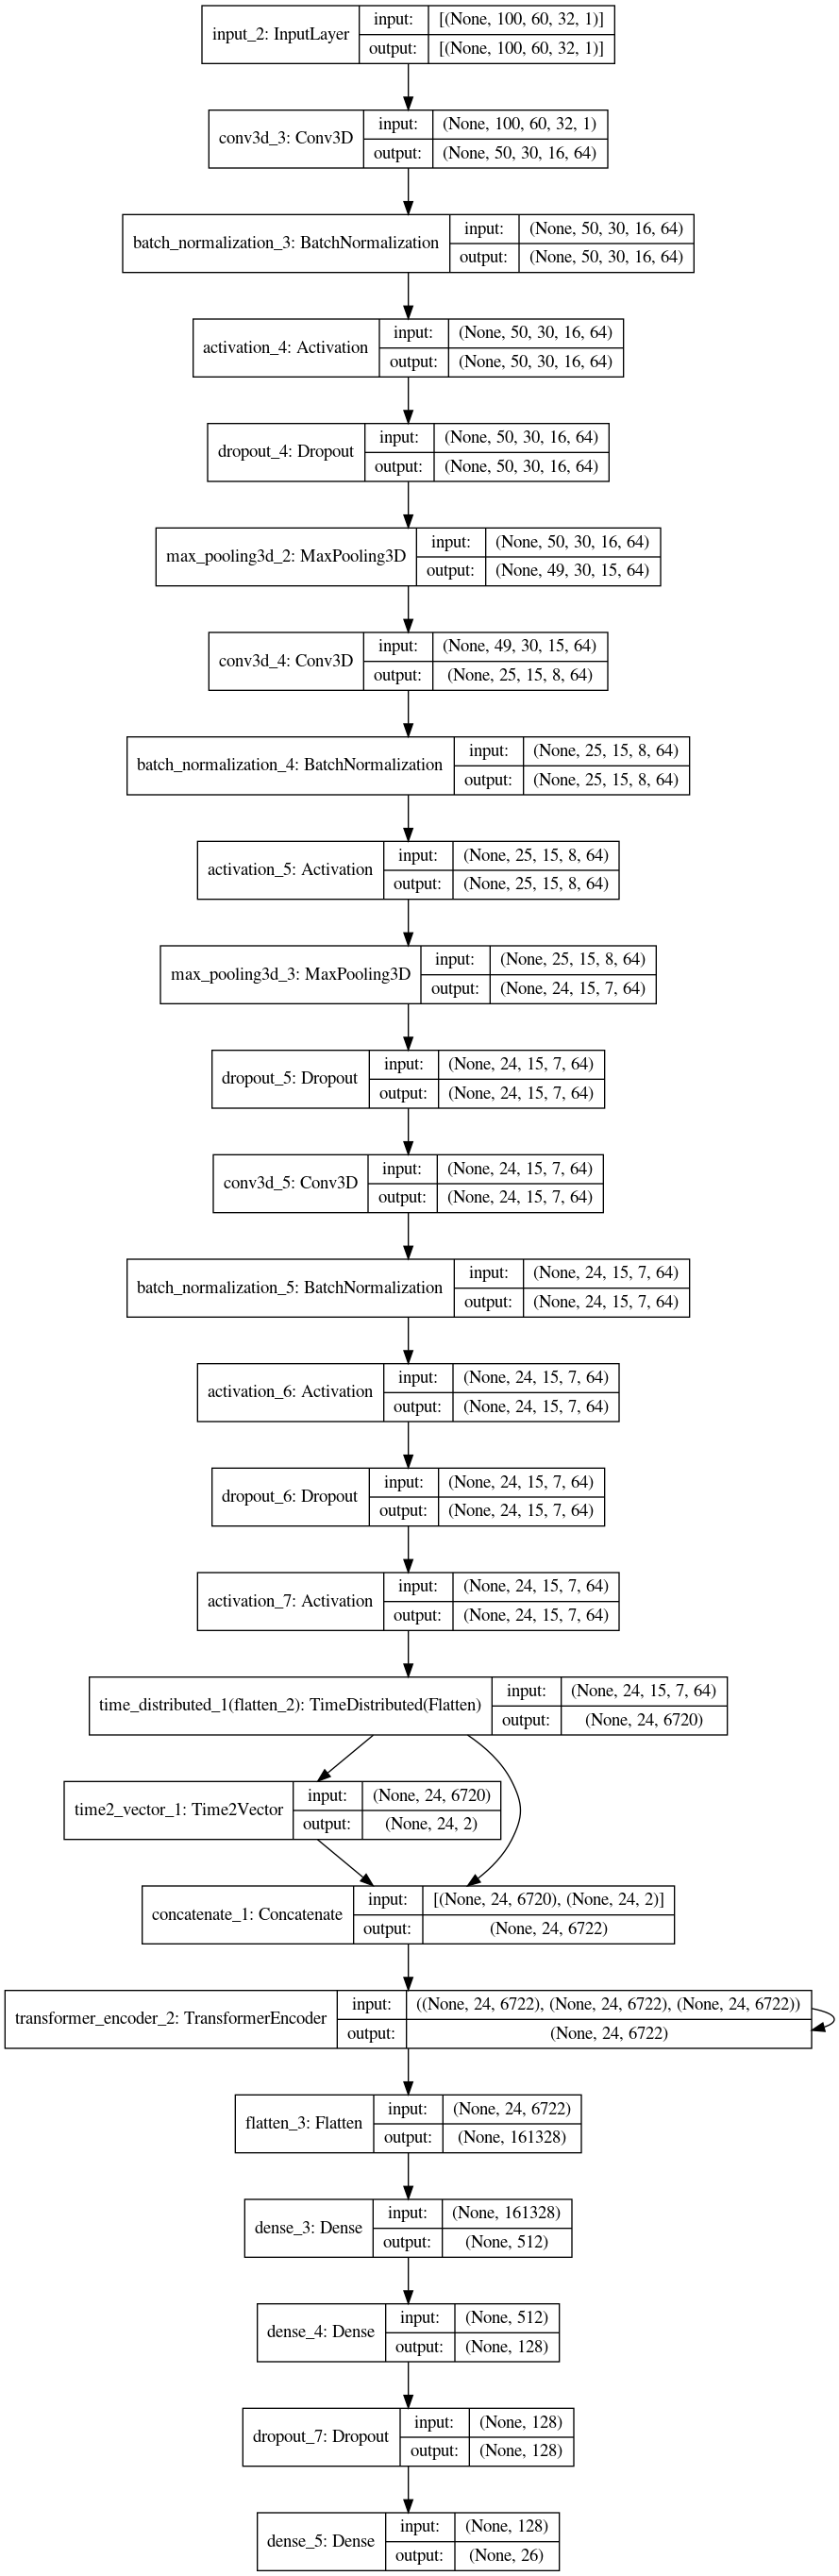

In [60]:
tf.keras.utils.plot_model(model, to_file='/media/naveen/nav/mat_codes/BioPatRec/transformer/Model1.png',show_shapes=True,show_layer_names=True,dpi=96)

In [61]:
# adam=optimizers.Adam(lr=2.17e-3, beta_1=0.9, beta_2=0.999,epsilon=1e-08, amsgrad=False)
adam=optimizers.Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999,epsilon=1e-08, amsgrad=False)
# sgd=optimizers.SGD(learning_rate=1e-3, momentum=0.9, nesterov=False, name='SGD')
checkpoint_filepath = '/media/naveen/nav/mat_codes/BioPatRec/transformer/checkpoint.hdf5'
# model.load_weights(checkpoint_filepath) 
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath,verbose=1, monitor='val_accuracy',save_weights_only=True,save_best_only=True)
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=0, mode='auto', baseline=None, restore_best_weights=True)
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 100, 60, 32, 0                                            
__________________________________________________________________________________________________
conv3d_3 (Conv3D)               (None, 50, 30, 16, 6 46720       input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_3 (BatchNor (None, 50, 30, 16, 6 256         conv3d_3[0][0]                   
__________________________________________________________________________________________________
activation_4 (Activation)       (None, 50, 30, 16, 6 0           batch_normalization_3[0][0]      
____________________________________________________________________________________________

In [62]:
if tf.test.gpu_device_name(): 

  print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

 print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [63]:
verbose, epochs, batch_size = 0, 200, 64

In [64]:
#     tf.keras.utils.plot_model(model, to_file='/media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/CNN20X10/Model1.png',show_shapes=True,show_layer_names=True,dpi=96)
csv_logger = CSVLogger('/media/naveen/nav/mat_codes/BioPatRec/transformer/LSTM_nina_20X100.csv', append=True, separator=';')
history = model.fit(x_train, y_train_hot, epochs=epochs, batch_size=batch_size, callbacks=[csv_logger,checkpoint_callback,lrate],validation_data=(x_test, y_test_hot), verbose=1)

Epoch 1/200
14/14 [==============================] - 34s 1s/step - loss: 3.9035 - accuracy: 0.0592 - val_loss: 3.4993 - val_accuracy: 0.0590

Epoch 00001: val_accuracy improved from -inf to 0.05896, saving model to /media/naveen/nav/mat_codes/BioPatRec/transformer/checkpoint.hdf5
Epoch 2/200
14/14 [==============================] - 14s 995ms/step - loss: 3.3237 - accuracy: 0.0768 - val_loss: 3.3927 - val_accuracy: 0.0816

Epoch 00002: val_accuracy improved from 0.05896 to 0.08163, saving model to /media/naveen/nav/mat_codes/BioPatRec/transformer/checkpoint.hdf5
Epoch 3/200
14/14 [==============================] - 14s 998ms/step - loss: 3.0296 - accuracy: 0.1222 - val_loss: 2.8972 - val_accuracy: 0.1678

Epoch 00003: val_accuracy improved from 0.08163 to 0.16780, saving model to /media/naveen/nav/mat_codes/BioPatRec/transformer/checkpoint.hdf5
Epoch 4/200
14/14 [==============================] - 14s 1s/step - loss: 2.8251 - accuracy: 0.1797 - val_loss: 2.5024 - val_accuracy: 0.2381

Epo

14/14 [==============================] - 14s 1s/step - loss: 2.0020 - accuracy: 0.3834 - val_loss: 2.2380 - val_accuracy: 0.3152

Epoch 00038: val_accuracy did not improve from 0.38776
Epoch 39/200
14/14 [==============================] - 14s 1s/step - loss: 2.1677 - accuracy: 0.3147 - val_loss: 2.4181 - val_accuracy: 0.2630

Epoch 00039: val_accuracy did not improve from 0.38776
Epoch 40/200
14/14 [==============================] - 15s 1s/step - loss: 2.2662 - accuracy: 0.3209 - val_loss: 2.3048 - val_accuracy: 0.2721

Epoch 00040: val_accuracy did not improve from 0.38776
Epoch 41/200
14/14 [==============================] - 15s 1s/step - loss: 2.1252 - accuracy: 0.3701 - val_loss: 2.3610 - val_accuracy: 0.2562

Epoch 00041: val_accuracy did not improve from 0.38776
Epoch 42/200
14/14 [==============================] - 15s 1s/step - loss: 2.1181 - accuracy: 0.3491 - val_loss: 2.1629 - val_accuracy: 0.3016

Epoch 00042: val_accuracy did not improve from 0.38776
Epoch 43/200
14/14 [===

14/14 [==============================] - 14s 1s/step - loss: 2.6370 - accuracy: 0.2009 - val_loss: 2.5086 - val_accuracy: 0.1995

Epoch 00079: val_accuracy did not improve from 0.38776
Epoch 80/200
14/14 [==============================] - 14s 1s/step - loss: 2.6406 - accuracy: 0.2161 - val_loss: 2.2851 - val_accuracy: 0.2676

Epoch 00080: val_accuracy did not improve from 0.38776
Epoch 81/200
14/14 [==============================] - 14s 1s/step - loss: 2.6011 - accuracy: 0.2242 - val_loss: 2.2384 - val_accuracy: 0.2630

Epoch 00081: val_accuracy did not improve from 0.38776
Epoch 82/200
14/14 [==============================] - 14s 1s/step - loss: 2.5248 - accuracy: 0.2219 - val_loss: 2.1908 - val_accuracy: 0.2948

Epoch 00082: val_accuracy did not improve from 0.38776
Epoch 83/200
14/14 [==============================] - 14s 1s/step - loss: 2.2691 - accuracy: 0.2989 - val_loss: 2.2591 - val_accuracy: 0.2676

Epoch 00083: val_accuracy did not improve from 0.38776
Epoch 84/200
14/14 [===

14/14 [==============================] - 14s 1s/step - loss: 1.6495 - accuracy: 0.4774 - val_loss: 2.0953 - val_accuracy: 0.3175

Epoch 00120: val_accuracy did not improve from 0.38776
Epoch 121/200
14/14 [==============================] - 14s 996ms/step - loss: 1.7610 - accuracy: 0.4491 - val_loss: 2.1751 - val_accuracy: 0.2857

Epoch 00121: val_accuracy did not improve from 0.38776
Epoch 122/200
14/14 [==============================] - 14s 996ms/step - loss: 1.6605 - accuracy: 0.4802 - val_loss: 2.1013 - val_accuracy: 0.3175

Epoch 00122: val_accuracy did not improve from 0.38776
Epoch 123/200
14/14 [==============================] - 14s 1s/step - loss: 1.6721 - accuracy: 0.4938 - val_loss: 2.1204 - val_accuracy: 0.3197

Epoch 00123: val_accuracy did not improve from 0.38776
Epoch 124/200
14/14 [==============================] - 14s 996ms/step - loss: 1.7774 - accuracy: 0.4462 - val_loss: 2.0784 - val_accuracy: 0.3265

Epoch 00124: val_accuracy did not improve from 0.38776
Epoch 125/

14/14 [==============================] - 14s 1s/step - loss: 1.4791 - accuracy: 0.5619 - val_loss: 2.0688 - val_accuracy: 0.3356

Epoch 00161: val_accuracy did not improve from 0.38776
Epoch 162/200
14/14 [==============================] - 14s 1000ms/step - loss: 1.5665 - accuracy: 0.5347 - val_loss: 2.0676 - val_accuracy: 0.3333

Epoch 00162: val_accuracy did not improve from 0.38776
Epoch 163/200
14/14 [==============================] - 14s 1s/step - loss: 1.5114 - accuracy: 0.5583 - val_loss: 2.0722 - val_accuracy: 0.3288

Epoch 00163: val_accuracy did not improve from 0.38776
Epoch 164/200
14/14 [==============================] - 15s 1s/step - loss: 1.5568 - accuracy: 0.5386 - val_loss: 2.0694 - val_accuracy: 0.3333

Epoch 00164: val_accuracy did not improve from 0.38776
Epoch 165/200
14/14 [==============================] - 14s 1s/step - loss: 1.4847 - accuracy: 0.5843 - val_loss: 2.0869 - val_accuracy: 0.3265

Epoch 00165: val_accuracy did not improve from 0.38776
Epoch 166/200
1

In [65]:
# #     tf.keras.utils.plot_model(model, to_file='/media/naveen/nav/mat_codes/nina_DB1_codes/nina_prep_python/olsson/CNN20X10/Model1.png',show_shapes=True,show_layer_names=True,dpi=96)
# csv_logger = CSVLogger('/media/naveen/nav/mat_codes/BioPatRec/CNN60X100/LSTM_nina_20X100.csv', append=True, separator=';')
# history = model.fit(x_train, y_train_hot, epochs=epochs, batch_size=batch_size, callbacks=[csv_logger,checkpoint_callback,lrate,early],validation_data=(x_test, y_test_hot), verbose=1)


In [66]:
best_index = history.history['val_accuracy'].index(max(history.history['val_accuracy']))
print('epoch_number',best_index+1)
print('train accuracy and validation accuracy', history.history['accuracy'][best_index], history.history['val_accuracy'][best_index]) 

epoch_number 35
train accuracy and validation accuracy 0.29671573638916016 0.3877550959587097


In [67]:
model.save('/media/naveen/nav/mat_codes/BioPatRec/transformer/CNN_LSTM_nina_5X97')

INFO:tensorflow:Assets written to: /media/naveen/nav/mat_codes/BioPatRec/transformer/CNN_LSTM_nina_5X97/assets


INFO:tensorflow:Assets written to: /media/naveen/nav/mat_codes/BioPatRec/transformer/CNN_LSTM_nina_5X97/assets


history loss
history accuracy
history val_loss
history val_accuracy
history lr


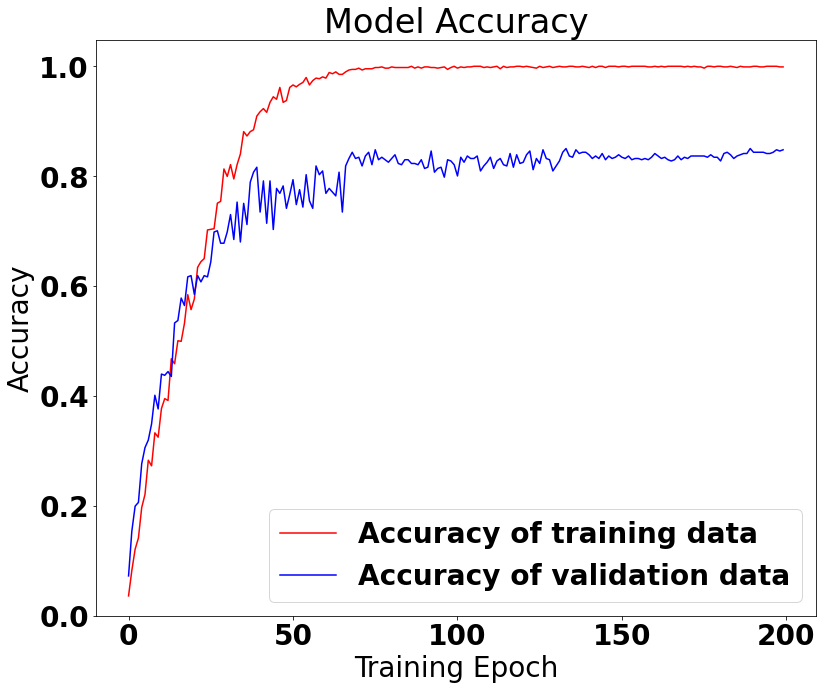

In [119]:
for i in history.history:
    print("history",i)
# facecolor='black'
BPRa=plt.figure(figsize=(10, 8),edgecolor='black')
# ax=figDB4.add_axes(("left", "bottom", "width", "height"))
ax= BPRa.add_axes((1,1,1,1))
ax.spines["top"].set_position(("outward", 0))
ax.spines["bottom"].set_position(("data", 0))
ax.spines["left"].set_position(("axes", 0))
ax.spines["right"].set_position(("outward", 0))

ax.spines["top"].set_color("black")
ax.spines["left"].set_color("black")
ax.spines["right"].set_color("black")
ax.spines["bottom"].set_color("black")

# ax.spines["left"].set_bounds(-.5, .5)
# ax.spines["right"].set_linestyle("--")
# ax.spines["bottom"].set_linewidth(6)
# ax.spines["bottom"].set_capstyle("round")

# plt2.rcParams['figure.facecolor'] = 'white'
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Training Epoch')

# plt2.ylim(0)
# plt2.rcParams['figure.facecolor'] = 'white'

# ax = fig.add_axes((left, bottom, width, height))
ax.set(facecolor="white")
# ax.patch.set_alpha(1.0)
plt.ylim(0)
plt.legend()
plt.show()

history loss
history accuracy
history val_loss
history val_accuracy
history lr


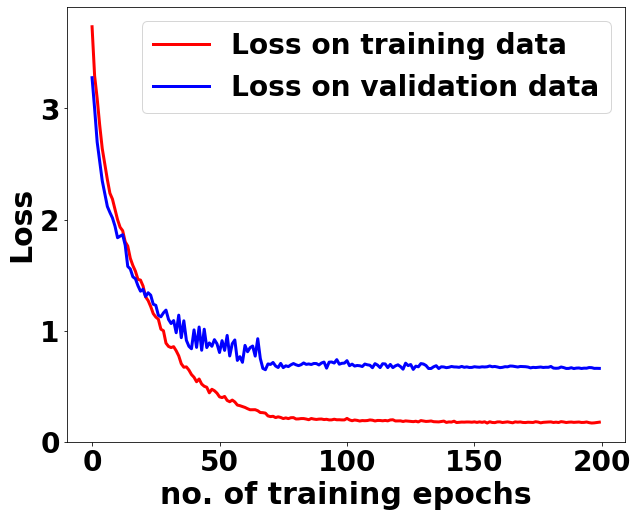

In [120]:
for i in history.history:
    print("history",i)
# facecolor='black'
# ax= figBPR.add_axes((1,1,1,1))
# ax.spines["top"].set_position(("outward", 0))
# ax.spines["bottom"].set_position(("data", 0))
# ax.spines["left"].set_position(("axes", 0))
# ax.spines["right"].set_position(("outward", 0))

# ax.spines["top"].set_color("black")
# ax.spines["left"].set_color("black")
# ax.spines["right"].set_color("black")
# ax.spines["bottom"].set_color("black") 

figBPR=plt.figure(figsize=(10, 8),edgecolor='black')
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 28}

plt.rc('font', **font)

# SMALL_SIZE = 12
# MEDIUM_SIZE = 14
# BIGGER_SIZE = 18

# figBPR.suptitle('test title', fontsize=20)
#plt.rc('xlabel', fontsize=14, weight = 'bold')
#plt.rc('ylabel', fontsize=14, weight = 'bold')

# plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
# plt.rc('axes', labelsize=MEDIUM_SIZE )     # fontsize of the axes title
# plt.rc('axes', labelsize=MEDIUM_SIZE, weight = 'bold')    # fontsize of the x and y labels
# plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
# plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
# plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
# plt.rc('figure', titlesize=BIGGER_SIZE )  # fontsize of the figure title

# ax=figBPR.add_axes(("left", "bottom", "width", "height"))
# ax= figBPR.add_axes((1,1,1,1))
# ax.spines["top"].set_position(("outward", 0))
# ax.spines["bottom"].set_position(("data", 0))
# ax.spines["left"].set_position(("axes", 0))
# ax.spines["right"].set_position(("outward", 0))

# ax.spines["top"].set_color("black")
# ax.spines["left"].set_color("black")
# ax.spines["right"].set_color("black")
# ax.spines["bottom"].set_color("black")

# ax.spines["left"].set_bounds(-.5, .5)
# ax.spines["right"].set_linestyle("--")

ax.spines["top"].set_linewidth(3)
ax.spines["top"].set_linestyle("-")
ax.spines["bottom"].set_linewidth(3)
ax.spines["bottom"].set_linestyle("-")
ax.spines["left"].set_linewidth(3)
ax.spines["left"].set_linestyle("-")
ax.spines["right"].set_linewidth(3)
ax.spines["right"].set_linestyle("-")
# ax.spines["bottom"].set_capstyle("round")

# plt2.rcParams['figure.facecolor'] = 'white'
plt.plot(history.history['loss'], 'r-', linewidth=3, label='Loss on training data')
plt.plot(history.history['val_loss'], 'b-', linewidth=3, label='Loss on validation data')
# plt.title('Loss curve for BioPatRec DB2',fontsize=18, weight = 'bold')

plt.ylabel('Loss',fontsize=30, weight = 'bold')
plt.xlabel('no. of training epochs',fontsize=30, weight = 'bold')
# plt2.ylim(0)
# plt2.rcParams['figure.facecolor'] = 'white'

# ax = fig.add_axes((left, bottom, width, height))
ax.set(facecolor="white")
# ax.patch.set_alpha(1.0)
plt.ylim(0)
plt.legend()
plt.show()

In [121]:
figBPR.savefig('/media/naveen/nav/plots/BioPatRec_15X400.eps',transparent=False)
# figBPR.savefig('/media/naveen/nav/plots/BioPatRec_20X300.pdf',transparent=False)

In [122]:
model.load_weights(checkpoint_filepath) 
_, testaccuracy = model.evaluate(x_test, y_test_hot, batch_size=batch_size, verbose=1)
print('test_accuracy',testaccuracy)

7/7 [==============================] - 2s 315ms/step - loss: 0.6597 - accuracy: 0.8503
test_accuracy 0.8503401279449463


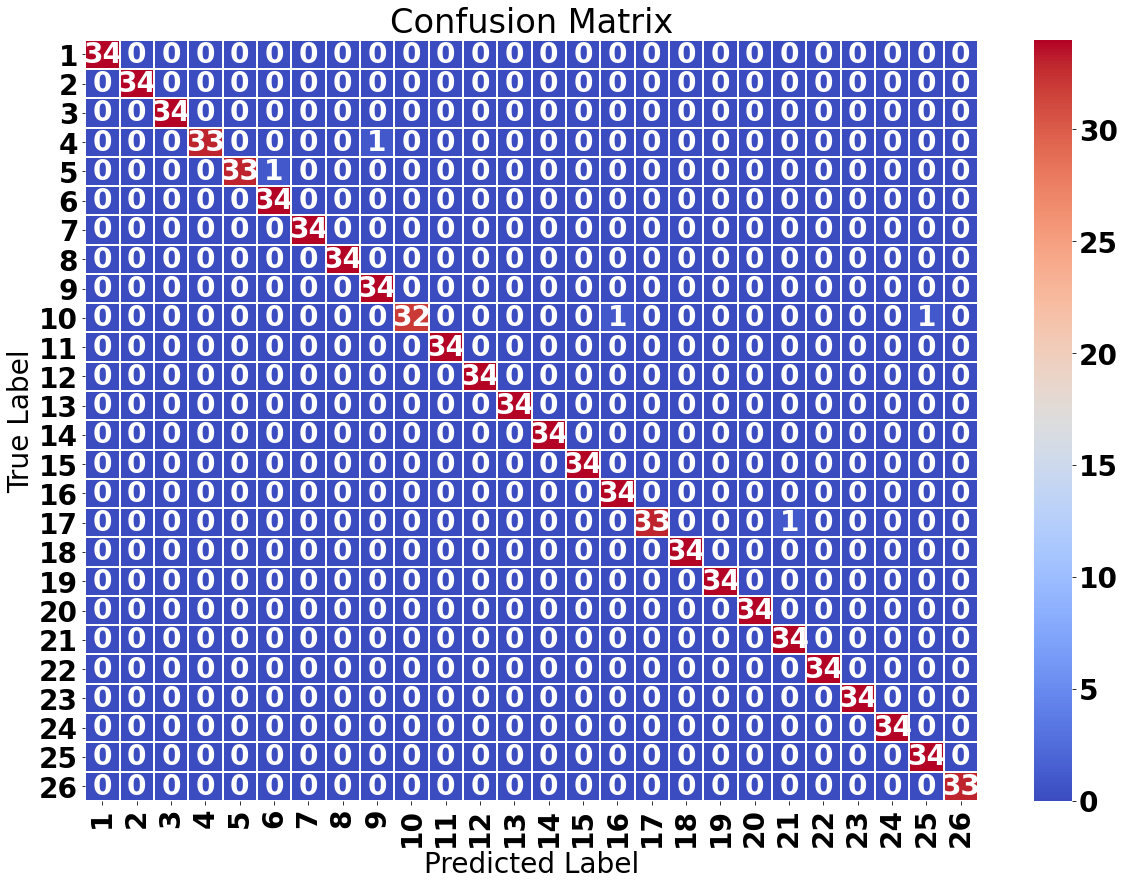

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        34
           3       1.00      0.97      0.99        34
           4       1.00      0.97      0.99        34
           5       0.97      1.00      0.99        34
           6       1.00      1.00      1.00        34
           7       1.00      1.00      1.00        34
           8       0.97      1.00      0.99        34
           9       1.00      0.94      0.97        34
          10       1.00      1.00      1.00        34
          11       1.00      1.00      1.00        34
          12       1.00      1.00      1.00        34
          13       1.00      1.00      1.00        34
          14       1.00      1.00      1.00        34
          15       0.97      1.00      0.99        34
          16       1.00      0.97      0.99        34
          17       1.00    

In [123]:
y_pred_train = model.predict(x_train)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
#max_y_train = np.argmax(y_train, axis=1)
show_confusion_matrix(y_train, max_y_pred_train)
print(classification_report(y_train, max_y_pred_train))

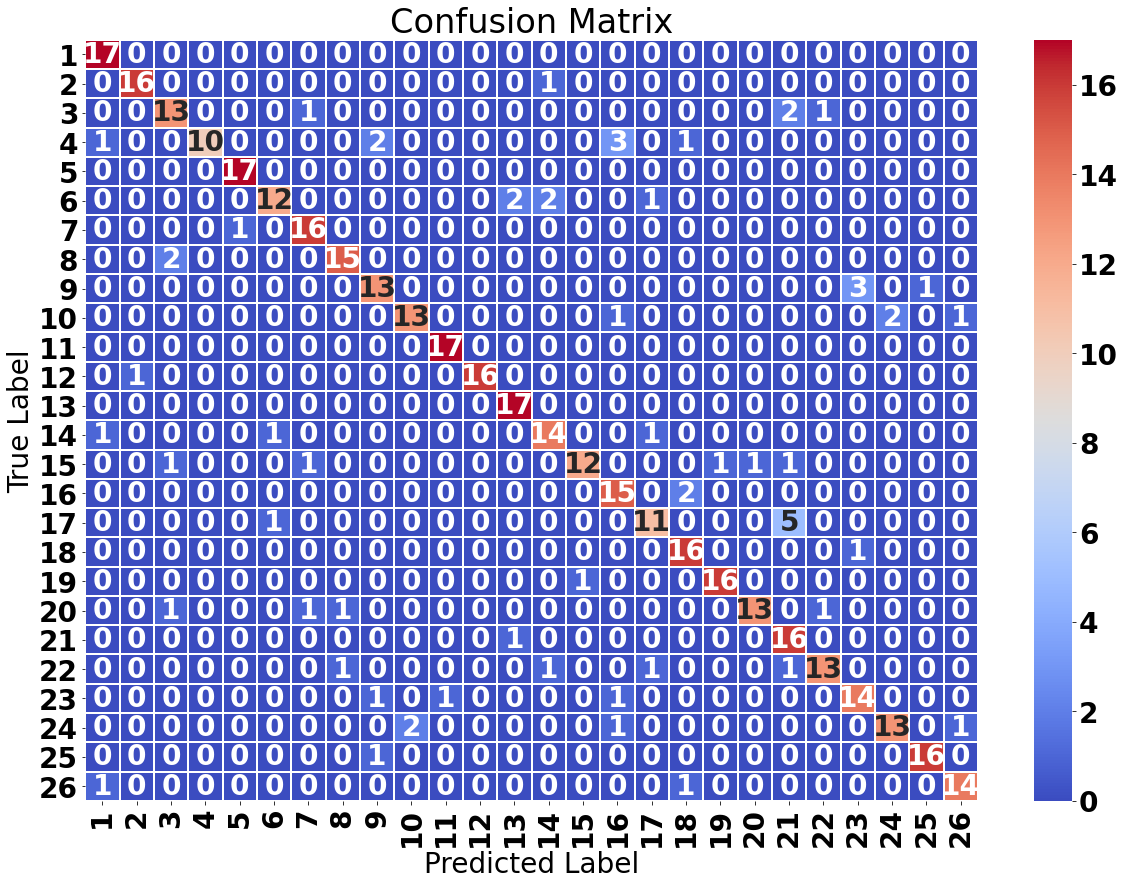

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        17
           1       0.94      0.94      0.94        17
           2       0.76      0.76      0.76        17
           3       1.00      0.59      0.74        17
           4       0.94      1.00      0.97        17
           5       0.86      0.71      0.77        17
           6       0.84      0.94      0.89        17
           7       0.88      0.88      0.88        17
           8       0.76      0.76      0.76        17
           9       0.87      0.76      0.81        17
          10       0.94      1.00      0.97        17
          11       1.00      0.94      0.97        17
          12       0.85      1.00      0.92        17
          13       0.78      0.82      0.80        17
          14       0.92      0.71      0.80        17
          15       0.71      0.88      0.79        17
          16       0.79      0.65      0.71        17
          17       0.80    

In [124]:
y_pred_test = model.predict(x_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test_hot, axis=1)
show_confusion_matrix(max_y_test, max_y_pred_test)
print(classification_report(max_y_test, max_y_pred_test))

In [125]:
# # naveen architecture
# model = Sequential()
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=9, padding='same', kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04)), \
#                            input_shape=(n_steps,n_length,n_depth)))
# model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
# model.add(TimeDistributed(MaxPooling1D(pool_size=8,strides=2)))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Activation('relu')))
# model.add(TimeDistributed(Flatten()))
# # model.add(Flatten())
# model.add(Bidirectional(LSTM(200,return_sequences=True)))
# model.add(Dropout(0.3))
# model.add(Bidirectional(LSTM(200,return_sequences=True)))
# model.add(Dropout(0.3))
# # model.add(Flatten())
# # model.add(Bidirectional(LSTM(200,return_sequences=True)))
# # model.add(Dropout(0.3))
# # model.add(Bidirectional(LSTM(200,return_sequences=True)))
# # model.add(Dropout(0.3))
# # model.add(Flatten())
# # model.add(BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None))
# # model.add(Bidirectional(LSTM(200)))
# # model.add(Dropout(0.3))
# model.add(Flatten())
# # model.add(Dense(2000, activation='tanh'))
# model.add(Dense(512, activation='tanh'))
# # model.add(Dense(200, activation='tanh'))
# model.add(BatchNormalization(epsilon=1e-05, momentum=0.9, weights=None))
# model.add(Dense(n_outputs, activation='softmax'))

In [126]:
# model = Sequential()
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=9, padding='same', kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04)), \
#                            input_shape=(n_steps,n_length,n_depth)))
# model.add(TimeDistributed(MaxPooling1D(pool_size=8,strides=2)))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Activation('relu')))
# model.add(TimeDistributed(Flatten()))
# # model.add(Bidirectional(LSTM(200,return_sequences=True)))
# # model.add(Dropout(0.5))
# # model.add(Bidirectional(LSTM(200,return_sequences=True)))
# # model.add(Dropout(0.5))
# # model.add(BatchNormalization(epsilon=1e-05, momentum=0.9, weights=None))
# model.add(Bidirectional(LSTM(200)))
# model.add(Dropout(0.5))
# model.add(Dense(512, activation='tanh'))
# model.add(BatchNormalization(epsilon=1e-05, momentum=0.9, weights=None))
# model.add(Dense(n_outputs, activation='softmax'))

In [127]:
# model = Sequential()
# model.add(TimeDistributed(Conv2D(filters=64, kernel_size=(9,1), padding='same', kernel_initializer="he_normal",strides=(3,1),kernel_regularizer=l1(1e-04)), \
#                            input_shape=(n_steps,n_length,n_depth,n_sub)))
# model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
# model.add(TimeDistributed(MaxPooling2D(pool_size=(8,1),strides=(2,1))))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Conv2D(filters=64, kernel_size=(5,1),padding="same",kernel_initializer="he_normal",strides=(2,1),kernel_regularizer=l1(1e-04))))
# model.add(TimeDistributed(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Activation('relu')))
# model.add(Flatten())
# model.add(Dense(512, activation='tanh',kernel_initializer="he_normal"))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None))
# model.add(Activation('tanh'))
# model.add(Dense(n_outputs, activation='softmax',kernel_initializer="he_normal"))

In [128]:
# model = Sequential()
# model.add(Conv2D(filters=64, kernel_size=(9,1), padding='same', kernel_initializer="he_normal",strides=(3,1),kernel_regularizer=l1(1e-04), \
#                            input_shape=(n_steps,n_length,n_depth)))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None))
# model.add(MaxPooling2D(pool_size=(8,1),strides=(2,1)))
# model.add(Activation('tanh'))
# model.add(Conv2D(filters=64, kernel_size=(5,1),padding="same",kernel_initializer="he_normal",strides=(2,1),kernel_regularizer=l1(1e-04)))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None))
# model.add(Activation('tanh'))
# model.add(Dropout(0.2093))
# model.add(Activation('relu'))
# model.add(Flatten())
# model.add(Dense(512, activation='tanh',kernel_initializer="he_normal"))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None))
# model.add(Activation('tanh'))
# model.add(Dense(n_outputs, activation='softmax',kernel_initializer="he_normal"))
# adam=optimizers.Adam(lr=2.17e-3, beta_1=0.9, beta_2=0.999,epsilon=1e-08, amsgrad=False)

In [129]:
# def create_model():
#   '''Initialize time and transformer layers'''
#   time_embedding = Time2Vector(seq_len)
#   # print('time_embedding',time_embedding)
#   attn_layer1 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
#   attn_layer2 = TransformerEncoder2(d_k, d_v, n_heads, ff_dim)
# #   attn_layer3 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
# #   attn_layer4 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)

#   #Conv1 = Conv1D(filters=64, kernel_size=9, padding='same', kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04)), \
#        #                    input_shape=(none, n_steps,n_vector)) 
 
#   '''Construct model'''
#   in_seq = Input(shape=(n_steps, n_length, n_depth))
#   x = in_seq
    
# #   x = DepthwiseConv2D(kernel_size=9, padding='same',data_format='channels_first', kernel_initializer='he_normal',strides=2,kernel_regularizer=l1(1e-04))(x)
                      
# # #   x = LayerNormalization(epsilon=1e-6)(x)     
# #   x = BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)(x)
# #   x = Activation('tanh')(x)
# #   x = Dropout(0.3)(x)
# # #   x = MaxPooling1D(pool_size=(2),strides=1)(x)  
# #   x = DepthwiseConv2D(kernel_size=7,padding="same",data_format='channels_first',kernel_initializer='he_normal',strides=2,kernel_regularizer=l1(1e-04))(x)
# # #   x = LayerNormalization(epsilon=1e-6)(x)
# #   x = BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)(x)
# #   x = Activation('tanh')(x)
# # #   x = MaxPooling1D(pool_size=(3),strides=1)(x) 
# # #   x = Bidirectional(LSTM(200,return_sequences=True))(x)
# #   x = Dropout(0.3)(x)
# #   x = SeparableConv1D(filters=64, kernel_size=5,padding="same",kernel_initializer='he_normal',strides=2,kernel_regularizer=l1(1e-04))(x)
# # #   x = LayerNormalization(epsilon=1e-6)(x)
# #   x = BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)(x)
# #   x = Activation('tanh')(x)
# # #   x = MaxPooling1D(pool_size=(3),strides=1)(x) 
# # #   x = Bidirectional(LSTM(200,return_sequences=True))(x)
# #   x = Dropout(0.3)(x)
# #   x = SeparableConv1D(filters=64, kernel_size=3,padding="same",kernel_initializer='he_normal',strides=2,kernel_regularizer=l1(1e-04))(x)
# # #   x = LayerNormalization(epsilon=1e-6)(x)
# #   x = BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)(x)
# #   x = Activation('tanh')(x)
# # #   x = MaxPooling1D(pool_size=(3),strides=1)(x) 
# # #   x = Bidirectional(LSTM(200,return_sequences=True))(x)
# #   x = Dropout(0.3)(x)
# #   x = Conv3D(64,3,strides=1,padding='same',kernel_regularizer=l1(1e-05),kernel_initializer='he_normal')(x)
# # #   x = LayerNormalization(epsilon=1e-6)(x)
# #   x = BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)(x)
# #   x = Activation('tanh')(x)
# # #   x = MaxPooling3D(pool_size=(2, 1, 2),strides=1)(x) 
# # #   x = Bidirectional(LSTM(200,return_sequences=True))(x)
# #   x = Dropout(0.3)(x)
#   x = TimeDistributed(Flatten())(x)
# #   print("x_shape",x.shape)
# #   l = x
# #   x1 = time_embedding(x)
# #   x = Concatenate(axis=-1)([l, x1])
#   for n in range(N_depth):  
#         x = attn_layer1((x, x, x))
#   print("x_shape",x.shape)
# #   for n in range(N_depth1):  
# #         x = attn_layer1((x, x, x))
# #   print("x_shape",x.shape)
#   z = x

#   z = Flatten()(z)
# #   x = Flatten()(x)
#   #x = Dense(2048, activation='tanh')(x)
#   #x = BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None)(x)
# #   x = Flatten()(x)
# #   x = Dropout(0.5)(x)
#   z = Dense(512, activation='tanh')(z)
# #   z = Dense(64, activation='tanh')(z)
# #   z = LayerNormalization(epsilon=1e-6)(z)
# #   z = BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None)(z)
# #   x = Dropout(0.5)(x)  
# #   x = Dense(512, activation='relu')(x)
#   z = Dropout(0.3)(z)
#   out = Dense(n_outputs, activation='softmax')(z)

#   model = Model(inputs=in_seq, outputs=out)
#   # adam=optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
#   # model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#   return model

In [130]:
# # 25 model creation
# def create_model():
#   '''Initialize time and transformer layers'''
#   time_embedding = Time2Vector(seq_len)
#   # print('time_embedding',time_embedding)
#   attn_layer1 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
#   attn_layer2 = TransformerEncoder2(d_k, d_v, n_heads, ff_dim)
# #   attn_layer3 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
# #   attn_layer4 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)

#   #Conv1 = Conv1D(filters=64, kernel_size=9, padding='same', kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04)), \
#        #                    input_shape=(none, n_steps,n_vector)) 
 
#   '''Construct model'''
#   in_seq = Input(shape=(n_steps, n_length, n_depth))
#   x = in_seq
    
#   x = Conv2D(32,9,strides=2,padding='same',kernel_regularizer=l1(1e-05),kernel_initializer='he_normal')(x)
# #   x = LayerNormalization(epsilon=1e-6)(x)     
#   x = BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)(x)
#   x = Activation('tanh')(x)
#   x = Dropout(0.3)(x)
#   x = MaxPooling2D(pool_size=(2, 1),strides=1)(x)  
#   x = Conv2D(64,5,strides=2,padding='same',kernel_regularizer=l1(1e-05),kernel_initializer='he_normal')(x)
# #   x = LayerNormalization(epsilon=1e-6)(x)
#   x = BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)(x)
#   x = Activation('tanh')(x)
#   x = MaxPooling2D(pool_size=(2, 1),strides=1)(x) 
# #   x = Bidirectional(LSTM(200,return_sequences=True))(x)
#   x = Dropout(0.3)(x)
# #   x = Conv3D(64,3,strides=1,padding='same',kernel_regularizer=l1(1e-05),kernel_initializer='he_normal')(x)
# # #   x = LayerNormalization(epsilon=1e-6)(x)
# #   x = BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)(x)
# #   x = Activation('tanh')(x)
# # #   x = MaxPooling3D(pool_size=(2, 1, 2),strides=1)(x) 
# # #   x = Bidirectional(LSTM(200,return_sequences=True))(x)
# #   x = Dropout(0.3)(x)
#   x = TimeDistributed(Flatten())(x)
# #   print("x_shape",x.shape)
# #   l = x
# #   x1 = time_embedding(x)
# #   x = Concatenate(axis=-1)([l, x1])
#   for n in range(N_depth):  
#         x = attn_layer1((x, x, x))
#   print("x_shape",x.shape)
# #   for n in range(N_depth1):  
# #         x = attn_layer1((x, x, x))
# #   print("x_shape",x.shape)
#   z = x

#   z = Flatten()(z)
# #   x = Flatten()(x)
#   #x = Dense(2048, activation='tanh')(x)
#   #x = BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None)(x)
# #   x = Flatten()(x)
# #   x = Dropout(0.5)(x)
#   z = Dense(512, activation='tanh')(z)
# #   z = Dense(64, activation='tanh')(z)
# #   z = LayerNormalization(epsilon=1e-6)(z)
# #   z = BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None)(z)
# #   x = Dropout(0.5)(x)  
# #   x = Dense(512, activation='relu')(x)
#   z = Dropout(0.3)(z)
#   out = Dense(n_outputs, activation='softmax')(z)

#   model = Model(inputs=in_seq, outputs=out)
#   # adam=optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
#   # model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#   return model

In [131]:
#   z = Bidirectional(LSTM(100,return_sequences=True))(z)
#   z = Dropout(0.3)(z)
#   x = LSTM(100,return_sequences=True)(x)
#   x = Dropout(0.3)(x)
#   x = LSTM(100,return_sequences=True)(x)
#   x = Dropout(0.3)(x)
#   x = Bidirectional(LSTM(100,return_sequences=True))(x)
#   x = Dropout(0.3)(x)
#   x = GlobalAveragePooling1D(data_format='channels_last')(x)

#   for n in range(N_depth1):  
#         x = attn_layer2((x, x, x))
#   x1 = time_embedding(in_seq)
#   xc = Concatenate(axis=-1)([x, x1])

#   xs = LSTM(200,return_sequences=True)(x)
#   xt = Dropout(0.3)(xt)
#   print("x_shape",x.shape)
#   n_dense = x.shape[-1]  
#   xs = LSTM(n_dense,return_sequences=True)(x)
#   xs = Dense(n_dense,activation='tanh')(xs)
    
# #   n_dense = xs.shape[-1]  
#   xs = Dense(n_dense,activation='softmax')(xs) 
    
# #   xt = LSTM(200,return_sequences=True)(x)
# #   xt = Dropout(0.3)(xt)
 
#   n_dense = x.shape[-1] 
#   xt = LSTM(n_dense,return_sequences=True)(x)
#   xt = Dense(n_dense,activation='relu')(xt)
    
#   n_dense = xt.shape[-1]  
#   xt = Dense(n_dense,activation='softmax')(xt) 
   
#   print("x_shape",x.shape)
#   print("xs_shape",xs.shape)
#   xp = tf.matmul(x, xs, transpose_b=True)

#   n_dense = x.shape[-1] 
#   xm = LSTM(n_dense,return_sequences=True)(xp)
#   xm = LSTM(n_dense,return_sequences=True)(xm)
#   xm = LSTM(n_dense,return_sequences=True)(xm)
#   xm = LSTM(n_dense,return_sequences=True)(xm)
#   xm = LSTM(n_dense,return_sequences=True)(xm)

#   n_dense = xm.shape[-1]  
#   xm = Dense(n_dense,activation='tanh')(xm)

#   print("xm_shape",xm.shape)
#   print("xt_shape",xt.shape)

#   xf = tf.matmul(xm, xt, transpose_b=True)
    
#   xtc = Concatenate(axis=-1)([x, xt])
#   xtc = Flatten()(xtc)
#   xtc = Dense(512, activation='tanh')(xtc)
#   xtc = Dense(512)(xtc)  
#   xtc = BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None)(xtc)
    
#   x = Conv3D(32,3,strides=1,padding='same',kernel_regularizer=l1(1e-05),kernel_initializer='he_normal')(x)
# #   x = LayerNormalization(epsilon=1e-6)(x)     
#   x = BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)(x)
#   x = Activation('tanh')(x)
# #   x = Dropout(0.3)(x)
#   x = MaxPooling3D(pool_size=(2, 1, 2),strides=1)(x)  
#   x = Conv3D(32,5,strides=1,padding='same',kernel_regularizer=l1(1e-05),kernel_initializer='he_normal')(x)
# #   x = LayerNormalization(epsilon=1e-6)(x)
#   x = BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)(x)
#   x = Activation('tanh')(x)
#   x = MaxPooling3D(pool_size=(2, 1, 2),strides=1)(x) 
    
#   x = Conv3D(64,3,strides=1,padding='same',kernel_regularizer=l1(1e-05),kernel_initializer='he_normal')(x)
# #   x = LayerNormalization(epsilon=1e-6)(x)     
#   x = BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)(x)
#   x = Activation('tanh')(x)
# #   x = Dropout(0.3)(x)
#   x = MaxPooling3D(pool_size=(2, 1, 2),strides=1)(x)  
#   x = Conv3D(64,5,strides=1,padding='same',kernel_regularizer=l1(1e-05),kernel_initializer='he_normal')(x)
# #   x = LayerNormalization(epsilon=1e-6)(x)
#   x = BatchNormalization(epsilon=1e-06, momentum=0.95, weights=None)(x)
#   x = Activation('tanh')(x)
# #   x = Dropout(0.3)(x)
#   xp = MaxPooling3D(pool_size=(2, 1, 2),strides=1)(x) 
# #   x = Activation('relu')(x)
# #   y = Conv1D(512, 3, padding='same', kernel_initializer='he_normal')(x) 
# #   print("x_shape",x.shape)
# #   pause  
# #   x1 = time_embedding(in_seq)
# #   x = Concatenate(axis=-1)([x, x1])
# #   x = Bidirectional(LSTM(100,return_sequences=True))(x)
# #   x = Dropout(0.3)(x)
# #   x = Bidirectional(LSTM(100,return_sequences=True))(x)
# #   x = Dropout(0.3)(x)
#   x = Permute(dims=(1, 4, 3, 2))(xp)
#   n_dense = x.shape[-1]  
#   x = Dense(n_dense,activation='softmax')(x)  
#   x = Permute(dims=(1, 4, 3, 2))(x)  
#   xp1 = tf.matmul(xp, x, transpose_b=True)
   
#   x = Permute(dims=(1, 4, 3, 2))(xp1)
#   n_dense = x.shape[-1]  
#   x = Dense(n_dense,activation='softmax')(x)  
#   x = Permute(dims=(1, 4, 3, 2))(x)  
#   xp2 = tf.matmul(xp1, x, transpose_b=True)
    
#   x = Permute(dims=(1, 4, 3, 2))(xp2)
#   n_dense = x.shape[-1]  
#   x = Dense(n_dense,activation='softmax')(x)  
#   x = Permute(dims=(1, 4, 3, 2))(x)  
#   xp3 = tf.matmul(xp2, x, transpose_b=True)
    
#   xp3 = TimeDistributed(Flatten())(xp3)
#   x2 = Conv1D(64, 5, padding='same', kernel_initializer='he_normal')(xc)
#   x2 = Conv1D(64, 3, padding='same', kernel_initializer='he_normal')(x2)
    
#   for n in range(N_depth1):  
#         x2 = attn_layer2((x2, x2, x2))
# #   z = concatenate([x, x2])
#   z = tf.add(x, x2)
#   for n in range(N_depth):  
#         xp3 = attn_layer1((xp3, xp3, xp3))
#   x = GlobalAveragePooling1D(data_format='channels_last')(x)
#   print("xf_shape",xf.shape)  
#   print("x_shape",x.shape) 

In [132]:
# class TransformerBlock(layers.Layer):
#     def __init__(self, embed_dim, num_heads, ff_dim, rate=0.5):
#         super(TransformerBlock, self).__init__()
#         self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
#         self.ffn = keras.Sequential([layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim), ])
#         self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
#         self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
#         self.dropout1 = layers.Dropout(rate)
#         self.dropout2 = layers.Dropout(rate)

#     def call(self, inputs, training):
#         attn_output = self.att(inputs, inputs)
#         attn_output = self.dropout1(attn_output, training=training)
#         out1 = self.layernorm1(inputs + attn_output)
#         ffn_output = self.ffn(out1)
#         ffn_output = self.dropout2(ffn_output, training=training)
#         out = self.layernorm2(out1 + ffn_output)
#         return out


# class TokenAndPositionEmbedding(layers.Layer):
#     def __init__(self, maxlen, embed_dim):
#         super(TokenAndPositionEmbedding, self).__init__()
#         self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

#     def call(self, x):
#         positions = tf.range(start=0, limit=maxlen, delta=1)
#         positions = self.pos_emb(positions)
#         x = tf.reshape(x, [-1, maxlen, embed_dim])
#         out = x + positions
#         return out


# maxlen = 3      # Only consider 3 input time points
# embed_dim = 97  # Features of each time point
# num_heads = 8   # Number of attention heads
# ff_dim = 64     # Hidden layer size in feed forward network inside transformer

# # Input Time-series
# inputs = layers.Input(shape=(maxlen*embed_dim,))
# embedding_layer = TokenAndPositionEmbedding(maxlen, embed_dim)
# x = embedding_layer(inputs)

# # Encoder Architecture
# transformer_block_1 = TransformerBlock(embed_dim=embed_dim, num_heads=num_heads, ff_dim=ff_dim)
# transformer_block_2 = TransformerBlock(embed_dim=embed_dim, num_heads=num_heads, ff_dim=ff_dim)
# x = transformer_block_1(x)
# x = transformer_block_2(x)

# # Output
# x = layers.GlobalMaxPooling1D()(x)
# x = layers.Dropout(0.5)(x)
# x = layers.Dense(64, activation="relu")(x)
# x = layers.Dropout(0.5)(x)
# outputs = layers.Dense(1, activation="sigmoid")(x)

# model = keras.Model(inputs=inputs, outputs=outputs)


In [133]:
# model = Sequential()
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=9, padding='same', kernel_initializer="he_normal",strides=3,kernel_regularizer=l1(1e-04)), \
#                            input_shape=(n_steps,n_length,n_depth)))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None))
# model.add(TimeDistributed(MaxPooling1D(pool_size=8,strides=2)))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Conv1D(filters=64, kernel_size=5,padding="same",kernel_initializer="he_normal",strides=2,kernel_regularizer=l1(1e-04))))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None))
# model.add(TimeDistributed(Activation('tanh')))
# model.add(TimeDistributed(Dropout(0.2093)))
# model.add(TimeDistributed(Activation('relu')))
# model.add(Flatten())
# model.add(Dense(512, activation='tanh'))
# model.add(BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None))
# model.add(Dense(n_outputs, activation='softmax'))

In [134]:
# # 25 model creation
# def create_model():
#   '''Initialize time and transformer layers'''
#   time_embedding = Time2Vector(seq_len)
#   # print('time_embedding',time_embedding)
#   attn_layer1 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
#   attn_layer2 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
#   attn_layer3 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
#   attn_layer4 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
#   attn_layer5 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)

#   '''Construct model'''
#   in_seq = Input(shape=(seq_len, n_vector))
#   x = in_seq
#   print("x_shape",x.shape)
#   x1 = time_embedding(in_seq)
#   print("x1_shape",x1.shape)
#   x1 = Concatenate(axis=-1)([in_seq, x1])
#   x1 = attn_layer1((x1, x1, x1))
#   x1 = attn_layer2((x1, x1, x1))
# #   x = attn_layer3((x, x, x))
# #   x = attn_layer4((x, x, x))
# #   x = attn_layer5((x, x, x))
# #   x = GlobalAveragePooling1D(data_format='channels_first')(x)
# #   x = TimeDistributed(Flatten())(x)
# # #   x = Flatten()(x)
# #   x = Bidirectional(LSTM(200,return_sequences=True))(x)
# #   x = Dropout(0.3)(x)
# #   x = Bidirectional(LSTM(200,return_sequences=True))(x)
# #   x = Dropout(0.3)(x)
# #   x = Flatten()(x)
#   time_embedding1 = Time2Vector(n_vector)
#   y = tf.transpose(x,perm=[0,2, 1])
# #   print("y_shape",y.shape)  
# #   in_seq2 = Input(shape=(n_vector, seq_len))
# #   y = in_seq2
# #   y = time_embedding1(in_seq2)
# #   y = Concatenate(axis=-1)([in_seq2, y])
# #   print("y_shape",y.shape)  
#   y = attn_layer3((y, y, y))
#   y = attn_layer4((y, y, y))
    
#   x1 = Flatten()(x1)
#   x1 = Dense(2048, activation='tanh')(x1)
#   x1 = BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None)(x1)
# #   x1 = Flatten()(x1)
# #   x1 = Dropout(0.1)(x1)
# #   x1 = Dense(1024, activation='tanh')(x1)
# #   x1 = BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None)(x1)  
#   x1 = Flatten()(x1)  

#   y = Flatten()(y)
#   y = Dense(2048, activation='tanh')(y)
#   y = BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None)(y)
# #   y = Flatten()(y)
# #   y = Dropout(0.1)(y)
# #   y = Dense(1024, activation='tanh')(y)
# #   y = BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None)(y)  
#   y = Flatten()(y) 
# #   y = Dropout(0.1)(y)
#   z = concatenate([x1, y])
#   z = Dense(1024, activation='tanh')(z)
#   z = BatchNormalization(epsilon=1e-06, momentum=0.9, weights=None)(z)
#   z = Dense(512, activation='relu')(z)
#   z = Dropout(0.1)(z)
#   out = Dense(n_outputs, activation='softmax')(z)

#   model = Model(inputs=in_seq, outputs=out)
#   # adam=optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
#   # model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#   return model